>># **PROJET : Anticipez les besoins en consommation de batiments**

>>>Source du jeu de données : 	https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download


>>>>>># **TRAITEE PROJET :**




# **Importation de librairies**

Importons dans un premier temps l'ensemble des librairies qui vont nous servir tout au long de l'étude :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt

Reglages de quelques paramètres

In [ ]:
#Formatons les colonnes en faisant en sorte que tous les décimaux soit affichés avec 3 chiffres après la virgule
pd.set_option('display.float_format', '{:.3f}'.format)

# Change les parametre de panda pour afficher toutes colonnes
pd.set_option('display.max_columns', None)

# **Exploration des données**

>## **Chargement des données**

In [ ]:
data_clients = pd.read_csv('olist_customers_dataset.csv')

data_geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')

data_order_items = pd.read_csv('olist_order_items_dataset.csv')

data_order_payment = pd.read_csv('olist_order_payments_dataset.csv')

data_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')

data_orders = pd.read_csv('olist_orders_dataset.csv')

data_products = pd.read_csv('olist_products_dataset.csv')

data_sellers = pd.read_csv('olist_sellers_dataset.csv')

data_product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

>## **Aperçu des données**

>> **Affichage de l'ensemble des données**

In [ ]:
def display_of_dataset(df, dataset_name="df"):
    print(f"{dataset_name} Ce dataset a {df.shape[0]} lignes et {df.shape[1]} colonnes")

    # Display
    print('\n')
    print(f"{dataset_name} :")
    display(df.head())

    #Structuration
    print('--'*20)
    print(f"{dataset_name} :")
    display(df.info())

    print('\n')
    print('=='*50)
    return df.shape[0], df.shape[1]


In [ ]:
customer_r, customer_c = display_of_dataset(data_clients, "Olist Customer")
geolocation_r, geolocation_c = display_of_dataset(data_geolocalisation, "Olist Geolocation")
order_items_r, order_items_c = display_of_dataset(data_order_items, "Olist Order Items")
order_payments_r, order_payments_c = display_of_dataset(data_order_payment, "Olist Order Payments")
order_reviews_r, order_reviews_c = display_of_dataset(data_order_reviews, "Olist Order Reviews")
orders_r, orders_c = display_of_dataset(data_orders, "Olist Orders")
products_r, products_c = display_of_dataset(data_products, "Olist Products")
sellers_r, sellers_c = display_of_dataset(data_sellers, "Olist Sellers")
data_product_category_name_translation_r, data_product_category_name_translation_c = display_of_dataset(data_product_category_name_translation, "Olist Product category Name Translation")

Olist Customer Ce dataset a 99441 lignes et 5 colonnes


Olist Customer :


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


----------------------------------------
Olist Customer :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None



Olist Geolocation Ce dataset a 1000163 lignes et 5 colonnes


Olist Geolocation :


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.546,-46.639,sao paulo,SP
1,1046,-23.546,-46.645,sao paulo,SP
2,1046,-23.546,-46.643,sao paulo,SP
3,1041,-23.544,-46.639,sao paulo,SP
4,1035,-23.542,-46.642,sao paulo,SP


----------------------------------------
Olist Geolocation :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None



Olist Order Items Ce dataset a 112650 lignes et 7 colonnes


Olist Order Items :


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900,13.290
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.900,19.930
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.000,17.870
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.990,12.790
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.900,18.140


----------------------------------------
Olist Order Items :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None



Olist Order Payments Ce dataset a 103886 lignes et 5 colonnes


Olist Order Payments :


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.330
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.390
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.710
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.780
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.450


----------------------------------------
Olist Order Payments :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None



Olist Order Reviews Ce dataset a 99224 lignes et 7 colonnes


Olist Order Reviews :


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


----------------------------------------
Olist Order Reviews :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None



Olist Orders Ce dataset a 99441 lignes et 8 colonnes


Olist Orders :


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


----------------------------------------
Olist Orders :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None



Olist Products Ce dataset a 32951 lignes et 9 colonnes


Olist Products :


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.000,287.000,1.000,225.000,16.000,10.000,14.000
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.000,276.000,1.000,1000.000,30.000,18.000,20.000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.000,250.000,1.000,154.000,18.000,9.000,15.000
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.000,261.000,1.000,371.000,26.000,4.000,26.000
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.000,402.000,4.000,625.000,20.000,17.000,13.000


----------------------------------------
Olist Products :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None



Olist Sellers Ce dataset a 3095 lignes et 4 colonnes


Olist Sellers :


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


----------------------------------------
Olist Sellers :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None



Olist Product category Name Translation Ce dataset a 71 lignes et 2 colonnes


Olist Product category Name Translation :


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


----------------------------------------
Olist Product category Name Translation :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

>>>#### **Determinons le nombre de valeurs nulles dans l'ensemble de données**

In [ ]:
def count_null_values(df, dataset_name):

    num_of_total_null_values = sum(df.isnull().sum().values)
    print('\n')
    print(f"Le dataset {dataset_name} a {num_of_total_null_values} valeurs nulles")
    return num_of_total_null_values

In [ ]:
customer_valNull = count_null_values(data_clients, "Olist Customer")
geolocation_valNull = count_null_values(data_geolocalisation, "Olist Geolocation")
order_items_valNull = count_null_values(data_order_items, "Olist Order Items")
order_payments_valNull = count_null_values(data_order_payment, "Olist Order Payments")
order_reviews_valNull = count_null_values(data_order_reviews, "Olist Order Reviews")
orders_valNull = count_null_values(data_orders, "Olist Orders")
products_valNull = count_null_values(data_products, "Olist Products")
sellers_valNull = count_null_values(data_sellers, "Olist Products")
product_category_name_translation_valNull = count_null_values(data_product_category_name_translation, "Olist product category name translation")



Le dataset Olist Customer a 0 valeurs nulles


Le dataset Olist Geolocation a 0 valeurs nulles


Le dataset Olist Order Items a 0 valeurs nulles


Le dataset Olist Order Payments a 0 valeurs nulles


Le dataset Olist Order Reviews a 145903 valeurs nulles


Le dataset Olist Orders a 4908 valeurs nulles


Le dataset Olist Products a 2448 valeurs nulles


Le dataset Olist Products a 0 valeurs nulles


Le dataset Olist product category name translation a 0 valeurs nulles


Les ensembles de données Olist Order Reviews, Orders et Products ont des valeurs nulles

>> **Inspectons cela de plus près**

>>>>##### **data_order_reviews**

In [ ]:
data_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
data_order_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

**==>** **data_order_reviews**  ---> review_comment_title

In [ ]:
data_order_reviews['review_comment_title'].unique()

array([nan, 'recomendo', 'Super recomendo', ...,
       'Não foi entregue o pedido', 'OTIMA EMBALAGEM', 'Foto enganosa '],
      dtype=object)

In [ ]:
data_order_reviews.loc[data_order_reviews['review_comment_title'].isin([np.nan])]['review_comment_title']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
99219    NaN
99220    NaN
99221    NaN
99222    NaN
99223    NaN
Name: review_comment_title, Length: 87656, dtype: object

**==>** **data_order_reviews**  ---> review_comment_message

In [ ]:
data_order_reviews['review_comment_message']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                    Recebi bem antes do prazo estipulado.
4        Parabéns lojas lannister adorei comprar pela I...
                               ...                        
99219                                                  NaN
99220                                                  NaN
99221    Excelente mochila, entrega super rápida. Super...
99222                                                  NaN
99223    meu produto chegou e ja tenho que devolver, po...
Name: review_comment_message, Length: 99224, dtype: object

In [ ]:
data_order_reviews.loc[data_order_reviews['review_comment_message'].isin([np.nan])]['review_comment_message']

0        NaN
1        NaN
2        NaN
5        NaN
6        NaN
        ... 
99217    NaN
99218    NaN
99219    NaN
99220    NaN
99222    NaN
Name: review_comment_message, Length: 58247, dtype: object

>>>>##### **data_orders**

In [ ]:
data_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
data_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

**==>** **data_orders**  ---> order_approved_at (date_approuvée_de_la_commande)

In [ ]:
data_orders['order_approved_at']

0        2017-10-02 11:07:15
1        2018-07-26 03:24:27
2        2018-08-08 08:55:23
3        2017-11-18 19:45:59
4        2018-02-13 22:20:29
                ...         
99436    2017-03-09 09:54:05
99437    2018-02-06 13:10:37
99438    2017-08-27 15:04:16
99439    2018-01-08 21:36:21
99440    2018-03-09 11:20:28
Name: order_approved_at, Length: 99441, dtype: object

In [ ]:
data_orders.loc[data_orders['order_approved_at'].isin([np.nan])]['order_approved_at']

1130     NaN
1801     NaN
1868     NaN
2029     NaN
2161     NaN
        ... 
97696    NaN
98415    NaN
98909    NaN
99283    NaN
99347    NaN
Name: order_approved_at, Length: 160, dtype: object

**==>** **data_orders**  ---> order_delivered_carrier_date (date_de_livraison_du_transporteur_de_la_commande)

In [ ]:
data_orders['order_delivered_carrier_date']

0        2017-10-04 19:55:00
1        2018-07-26 14:31:00
2        2018-08-08 13:50:00
3        2017-11-22 13:39:59
4        2018-02-14 19:46:34
                ...         
99436    2017-03-10 11:18:03
99437    2018-02-07 23:22:42
99438    2017-08-28 20:52:26
99439    2018-01-12 15:35:03
99440    2018-03-09 22:11:59
Name: order_delivered_carrier_date, Length: 99441, dtype: object

In [ ]:
data_orders.loc[data_orders['order_delivered_carrier_date'].isin([np.nan])]['order_delivered_carrier_date']

6        NaN
103      NaN
128      NaN
266      NaN
324      NaN
        ... 
99283    NaN
99313    NaN
99347    NaN
99348    NaN
99415    NaN
Name: order_delivered_carrier_date, Length: 1783, dtype: object

**==>** **data_orders**  ---> order_delivered_customer_date (date_de_la_commande_livrée_au_client)

In [ ]:
data_orders['order_delivered_customer_date']

0        2017-10-10 21:25:13
1        2018-08-07 15:27:45
2        2018-08-17 18:06:29
3        2017-12-02 00:28:42
4        2018-02-16 18:17:02
                ...         
99436    2017-03-17 15:08:01
99437    2018-02-28 17:37:56
99438    2017-09-21 11:24:17
99439    2018-01-25 23:32:54
99440    2018-03-16 13:08:30
Name: order_delivered_customer_date, Length: 99441, dtype: object

In [ ]:
data_orders.loc[data_orders['order_delivered_customer_date'].isin([np.nan])]['order_delivered_customer_date']

6        NaN
44       NaN
103      NaN
128      NaN
154      NaN
        ... 
99283    NaN
99313    NaN
99347    NaN
99348    NaN
99415    NaN
Name: order_delivered_customer_date, Length: 2965, dtype: object

>>>>##### **data_products**

In [ ]:
data_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
data_products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

**==>** **data_products** -----> product_category_name (nom_de_la_catégorie_de_produit)

In [ ]:
data_products.loc[data_products['product_category_name'].isin([np.nan])]['product_category_name']


105      NaN
128      NaN
145      NaN
154      NaN
197      NaN
        ... 
32515    NaN
32589    NaN
32616    NaN
32772    NaN
32852    NaN
Name: product_category_name, Length: 610, dtype: object

**==>** **data_products** -----> product_name_lenght (nom_du_produit_longueur)

In [ ]:
data_products['product_name_lenght'].unique()

array([40., 44., 46., 27., 37., 60., 56., 57., 36., 54., 49., 43., 51.,
       59., 22., 39., 52., 58., 55., 35., 50., 45., 31., 47., 63., 33.,
       38., 20., 42., 53., 41., nan, 30., 34., 48., 29., 32., 25., 23.,
       64., 28., 19., 61., 21., 62., 18., 17., 24., 26., 15., 16., 10.,
       14., 69.,  9., 13., 12., 11.,  7.,  8., 68.,  5., 66., 72., 67.,
       76.,  6.])

In [ ]:
data_products.loc[data_products['product_name_lenght'].isin([np.nan])]['product_name_lenght']

105     NaN
128     NaN
145     NaN
154     NaN
197     NaN
         ..
32515   NaN
32589   NaN
32616   NaN
32772   NaN
32852   NaN
Name: product_name_lenght, Length: 610, dtype: float64

**==>** **data_products** -----> product_description_lenght (description_du_produit)

In [ ]:
data_products['product_description_lenght'].unique()

array([ 287.,  276.,  250., ..., 2836., 3364., 2207.])

In [ ]:
data_products.loc[data_products['product_description_lenght'].isin([np.nan])]['product_description_lenght']

105     NaN
128     NaN
145     NaN
154     NaN
197     NaN
         ..
32515   NaN
32589   NaN
32616   NaN
32772   NaN
32852   NaN
Name: product_description_lenght, Length: 610, dtype: float64

**==>** **data_products** -----> product_photos_qty (Quantité_photos_produit)

In [ ]:
data_products['product_photos_qty'].unique()

array([ 1.,  4.,  2.,  3.,  5.,  9.,  6., nan,  7., 12., 10., 11., 17.,
        8., 15., 13., 14., 20., 18., 19.])

In [ ]:
data_products.loc[data_products['product_photos_qty'].isin([np.nan])]['product_photos_qty']

105     NaN
128     NaN
145     NaN
154     NaN
197     NaN
         ..
32515   NaN
32589   NaN
32616   NaN
32772   NaN
32852   NaN
Name: product_photos_qty, Length: 610, dtype: float64

**==>** **data_products** -----> product_weight_g (poids du produit en g)

In [ ]:
data_products['product_weight_g'].unique()

array([ 225., 1000.,  154., ..., 1206.,  934., 1920.])

In [ ]:
data_products.loc[data_products['product_weight_g'].isin([np.nan])]['product_weight_g']

8578    NaN
18851   NaN
Name: product_weight_g, dtype: float64

**==>** **data_products** -----> product_length_cm (longueur du produit en cm)

In [ ]:
data_products['product_length_cm'].unique()

array([ 16.,  30.,  18.,  26.,  20.,  38.,  70.,  40.,  27.,  17.,  50.,
        68., 100.,  29.,  36.,  21.,  35.,  42.,  23.,  62.,  52.,  34.,
        33.,  87.,  19.,  25.,  49.,  22.,  45.,  47.,  69.,  60.,  41.,
        32.,  24.,  44.,  63.,  55., 105.,  53.,  75.,  43.,  37.,  80.,
        39.,  65.,  58.,  56.,  46.,  84.,  57.,  61.,  71.,  31.,  85.,
        13.,  28.,  66.,  78.,  51.,  76.,  48.,  88.,  83.,  95., 102.,
        92.,  59.,  14.,   8.,  11.,  82.,  67.,  54.,  15.,  98.,  64.,
        79.,  90.,  72.,  93., 103.,  74.,  77.,  12.,  81.,  94., 101.,
        86., 104.,   9.,  89.,  91.,  99.,  97.,  nan,  10.,  96.,  73.,
         7.])

In [ ]:
data_products.loc[data_products['product_length_cm'].isin([np.nan])]['product_length_cm']

8578    NaN
18851   NaN
Name: product_length_cm, dtype: float64

**==>** **data_products** -----> product_height_cm (hauteur du produit en cm)

In [ ]:
data_products['product_height_cm'].unique()

array([ 10.,  18.,   9.,   4.,  17.,   5.,  24.,   8.,  13.,  19.,   7.,
        11.,   2.,  15.,  25.,  23.,  51.,  30.,   3.,  12.,  20.,  40.,
        32.,  16.,  28.,  14.,  50.,  21.,  66.,  22.,   6.,  26.,  70.,
        60.,  63.,  44.,  36.,  34.,  81.,  35.,  88.,  33.,  61.,  27.,
        45., 102.,  43.,  48.,  55.,  41.,  29.,  31.,  37.,  65., 103.,
        52.,  53.,  69.,  82., 100.,  49.,  74.,  54.,  57.,  42.,  93.,
        39.,  38.,  47.,  80.,  62., 105.,  64.,  78.,  72.,  90.,  46.,
        77.,  96.,  73.,  67.,  58., 104.,  71.,  79.,  75.,  85.,  68.,
        56.,  83.,  84.,  86.,  59.,  76.,  87.,  nan,  99.,  95.,  89.,
        92.,  94.,  98.,  97.])

In [ ]:
data_products.loc[data_products['product_height_cm'].isin([np.nan])]['product_height_cm']

8578    NaN
18851   NaN
Name: product_height_cm, dtype: float64

**==>** **data_products** -----> product_width_cm (largeur du produit en cm)

In [ ]:
data_products['product_width_cm'].unique()

array([ 14.,  20.,  15.,  26.,  13.,  11.,  44.,  40.,  17.,  12.,  16.,
        45.,  30.,  50.,  23.,  34.,  31.,  42.,  25.,  41.,  35.,  79.,
        38.,  47.,  24.,  49.,  37.,  39.,  53.,  27.,  18.,  56.,  70.,
        33.,  55.,  22.,  32.,  46.,  19.,  28.,  43.,  58.,  36.,  21.,
        67.,  48., 105.,  51.,  60.,  29.,  52.,  59.,  71.,  68.,  65.,
         6.,   8.,  10.,  54.,  57.,  74.,  92.,  82.,  61.,  76.,  63.,
        93.,  73.,  80.,  87.,  78.,  83.,   9.,  84.,  91.,  69.,  64.,
        90.,  62.,  85.,  66.,  75., 100.,  nan, 102.,  95.,  72.,  98.,
        86.,   7., 103., 101., 118.,  97.,  77., 104.])

In [ ]:
data_products.loc[data_products['product_width_cm'].isin([np.nan])]['product_width_cm']

8578    NaN
18851   NaN
Name: product_width_cm, dtype: float64

>>>#### **Detection de potentiel doublons dans l'ensemble de données**

In [ ]:
def count_duplicate_values(df, dataset_name):
    num_of_duplicate_values = df.duplicated().sum()
    print(f"Le dataset {dataset_name} a {num_of_duplicate_values} valeurs dupliquées potentielles")
    print('\n')
    return num_of_duplicate_values


In [ ]:
customer_duplicates = count_duplicate_values(data_clients, "Olist Customer")
geolocation_duplicates = count_duplicate_values(data_geolocalisation, "Olist Geolocation")
order_items_duplicates = count_duplicate_values(data_order_items, "Olist Order Items")
order_payments_duplicates = count_duplicate_values(data_order_payment, "Olist Order Payments")
order_reviews_duplicates = count_duplicate_values(data_order_reviews, "Olist Order Reviews")
orders_duplicates = count_duplicate_values(data_orders, "Olist Orders")
products_duplicates = count_duplicate_values(data_products, "Olist Products")
sellers_duplicates = count_duplicate_values(data_sellers, "Olist sellers")
product_category_name_translation_duplicates = count_duplicate_values(data_product_category_name_translation, "Olist Product category Name Translation")

Le dataset Olist Customer a 0 valeurs dupliquées potentielles


Le dataset Olist Geolocation a 261831 valeurs dupliquées potentielles


Le dataset Olist Order Items a 0 valeurs dupliquées potentielles


Le dataset Olist Order Payments a 0 valeurs dupliquées potentielles


Le dataset Olist Order Reviews a 0 valeurs dupliquées potentielles


Le dataset Olist Orders a 0 valeurs dupliquées potentielles


Le dataset Olist Products a 0 valeurs dupliquées potentielles


Le dataset Olist sellers a 0 valeurs dupliquées potentielles


Le dataset Olist Product category Name Translation a 0 valeurs dupliquées potentielles




 **Inspectons la présence potentiel de doublons dans le dataset de plus près :**

>>>>##### **data_clients**

In [ ]:
data_clients.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [ ]:
# Comptons nos doublons un par un
print(f"Nombre de doublons : {data_clients.duplicated('customer_unique_id', keep=False).sum()}")

Nombre de doublons : 6342


In [ ]:
duplicates = data_clients[data_clients.duplicated('customer_unique_id', keep=False)]['customer_unique_id']
print(duplicates)
print('\n')
print(f'Nombre de doublons : {duplicates.count()}')

5        4c93744516667ad3b8f1fb645a3116a4
8        1175e95fb47ddff9de6b2b06188f7e0d
13       295c05e81917928d76245e842748184d
32       e9dd12dca17352644a959d9dea133935
33       e079b18794454de9d2be5c12b4392294
                       ...               
99324    8bab3162259edfaadd1ea2e1fe7f58dc
99327    12ab9334b1240d6d037f2b0102a49571
99336    0ee57f62666561b72f2ceacad0230cbf
99353    0ceb502fc33a2ad327b08288c5310e2e
99406    5cbfdb85ec130898108b32c50d619c39
Name: customer_unique_id, Length: 6342, dtype: object


Nombre de doublons : 6342


In [ ]:
data_clients[data_clients.duplicated('customer_unique_id', keep=False)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP
32,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,camacari,BA
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [ ]:
data_clients.shape

(99441, 5)

In [ ]:
data_clients.drop_duplicates(subset='customer_unique_id', keep='first', inplace=True)
data_clients.shape

(96096, 5)

>>>>##### **data_order_payment**

In [ ]:
data_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.330
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.390
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.710
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.780
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.450


In [ ]:
data_order_payment['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [ ]:
duplicates = data_order_payment[data_order_payment.duplicated('order_id', keep=False)]['order_id']
print(duplicates)
print('\n')
print(f'Nombre de doublons : {duplicates.count()}')

25        5cfd514482e22bc992e7693f0e3e8df7
35        b2bb080b6bc860118a246fd9b6fad6da
75        3689194c14ad4e2e7361ebd1df0e77b0
84        723e462ce1ee50e024887c0b403130f3
102       21b8b46679ea6482cbf911d960490048
                        ...               
103778    fd86c80924b4be8fb7f58c4ecc680dae
103817    6d4616de4341417e17978fe57aec1c46
103860    31bc09fdbd701a7a4f9b55b5955b8687
103869    c9b01bef18eb84888f0fd071b8413b38
103874    d41f1036712e18ee525939d08b7a1c98
Name: order_id, Length: 7407, dtype: object


Nombre de doublons : 7407


>>>>##### **data_order_reviews**

In [ ]:
data_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
duplicates = data_order_reviews[data_order_reviews.duplicated('review_id', keep=False)]['review_id']
print(duplicates)
print('\n')
print(f'Nombre de doublons : {duplicates.count()}')

200      28642ce6250b94cc72bc85960aec6c62
344      a0a641414ff718ca079b3967ef5c2495
346      f4d74b17cd63ee35efa82cd2567de911
360      ecbaf1fce7d2c09bfab46f89065afeaf
393      6b1de94de0f4bd84dfc4136818242faa
                       ...               
99108    2c6c08892b83ba4c1be33037c2842294
99124    6ec93e77f444e0b1703740a69122e35d
99164    2afe63a67dfd99b3038f568fb47ee761
99167    017808d29fd1f942d97e50184dfb4c13
99178    44d1e9165ec54b1d89d33594856af859
Name: review_id, Length: 1603, dtype: object


Nombre de doublons : 1603


A nettoyer

>>>>##### **data_orders**

A verifier à quoi il correspond dans la table

In [ ]:
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data_orders.duplicated('customer_id').sum()

0

In [ ]:
data_orders.duplicated('order_id').sum()

0

>>>>##### **data_products**

In [ ]:
data_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.000,287.000,1.000,225.000,16.000,10.000,14.000
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.000,276.000,1.000,1000.000,30.000,18.000,20.000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.000,250.000,1.000,154.000,18.000,9.000,15.000
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.000,261.000,1.000,371.000,26.000,4.000,26.000
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.000,402.000,4.000,625.000,20.000,17.000,13.000


In [ ]:
data_products.duplicated('product_id').sum()

0

>>>>##### **data_sellers**

In [ ]:
data_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
data_sellers.duplicated('seller_id').sum()

0

>>>>##### **data_product_category_name_translation**

In [ ]:
data_product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
data_product_category_name_translation.duplicated('product_category_name').sum()

0

>## **Renommons les colonnes de nos datasets**

>>### **data_orders**


In [ ]:
nouvelles_colonnes = {
    'order_id': 'Identifiant_commande',
    'customer_id': 'Identifiant_client',
    'order_status': 'Statut_commande',
    'order_purchase_timestamp': 'Horodatage_achat',
    'order_approved_at': 'Horodatage_validation',
    'order_delivered_carrier_date': 'Horodatage_livraison_transporteur',
    'order_delivered_customer_date': 'Horodatage_livraison_client',
    'order_estimated_delivery_date': 'Date_livraison_estimee'
}

data_orders = data_orders.rename(columns=nouvelles_colonnes)
data_orders.head()

,Identifiant_commande,Identifiant_client,Statut_commande,Horodatage_achat,Horodatage_validation,Horodatage_livraison_transporteur,Horodatage_livraison_client,Date_livraison_estimee
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


>>### **data_clients**

In [ ]:
nouvelles_colonnes = {
    'customer_id': 'Identifiant_client',
    'customer_unique_id': 'ID_unique_client',
    'customer_zip_code_prefix': 'Code_postal_client',
    'customer_city': 'Ville_client',
    'customer_state': 'Etat_client'
}

data_clients = data_clients.rename(columns=nouvelles_colonnes)
data_clients.head()

,Identifiant_client,ID_unique_client,Code_postal_client,Ville_client,Etat_client
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


>>### **data_geolocalisation**

In [ ]:
nouvelles_colonnes = {
    'geolocation_zip_code_prefix': 'Code_postal',
    'geolocation_lat': 'Latitude',
    'geolocation_lng': 'Longitude',
    'geolocation_city': 'Ville',
    'geolocation_state': 'Etat'
}

data_geolocalisation = data_geolocalisation.rename(columns=nouvelles_colonnes)
data_geolocalisation.head()

,Code_postal,Latitude,Longitude,Ville,Etat
0,1037,-23.546,-46.639,sao paulo,SP
1,1046,-23.546,-46.645,sao paulo,SP
2,1046,-23.546,-46.643,sao paulo,SP
3,1041,-23.544,-46.639,sao paulo,SP
4,1035,-23.542,-46.642,sao paulo,SP


In [ ]:
data_geolocalisation['Ville'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [ ]:
data_geolocalisation[['Ville', 'Etat']].value_counts()

Ville                    Etat
sao paulo                SP      135799
rio de janeiro           RJ       62149
belo horizonte           MG       27805
são paulo                SP       24917
curitiba                 PR       16593
                                  ...  
olho d'água              PB           1
santa inês               PB           1
domingos mourão          PI           1
são gonçalo de botelhos  MG           1
* cidade                 PR           1
Length: 8463, dtype: int64

>>### **data_order_items**

In [ ]:
nouvelles_colonnes = {
    'order_id': 'Identifiant_commande',
    'order_item_id': 'Identifiant_article_commande',
    'product_id': 'Identifiant_produit',
    'seller_id': 'Identifiant_vendeur',
    'shipping_limit_date': 'Date_limite_livraison',
    'price': 'Prix',
    'freight_value': 'Frais_de_port'
}

data_order_items = data_order_items.rename(columns=nouvelles_colonnes)
data_order_items.head()

,Identifiant_commande,Identifiant_article_commande,Identifiant_produit,Identifiant_vendeur,Date_limite_livraison,Prix,Frais_de_port
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900,13.290
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.900,19.930
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.000,17.870
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.990,12.790
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.900,18.140


>>### **data_order_payment**

In [ ]:
# Définir un dictionnaire de correspondance pour les noms de colonnes en français
nouvelles_colonnes = {
    'order_id': 'Identifiant_commande',
    'payment_sequential': 'Paiement_séquentiel',
    'payment_type': 'Type_paiement',
    'payment_installments': 'Paiement_en_plusieurs_fois',
    'payment_value': 'Valeur_paiement'
}

# Renommer les colonnes en utilisant le dictionnaire de correspondance
data_order_payment = data_order_payment.rename(columns=nouvelles_colonnes)
data_order_payment.head()

,Identifiant_commande,Paiement_séquentiel,Type_paiement,Paiement_en_plusieurs_fois,Valeur_paiement
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.330
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.390
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.710
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.780
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.450


>>### **data_order_reviews**

In [ ]:
nouvelles_colonnes = {
    'review_id': 'Identifiant_commentaire',
    'order_id': 'Identifiant_commande',
    'review_score': 'Score_commentaire',
    'review_comment_title': 'Titre_commentaire',
    'review_comment_message': 'Message_commentaire',
    'review_creation_date': 'Date_creation_commentaire',
    'review_answer_timestamp': 'Horodatage_réponse_commentaire'
}

data_order_reviews = data_order_reviews.rename(columns=nouvelles_colonnes)
data_order_reviews.head()

,Identifiant_commentaire,Identifiant_commande,Score_commentaire,Titre_commentaire,Message_commentaire,Date_creation_commentaire,Horodatage_réponse_commentaire
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


>>### **data_products**

In [ ]:
nouvelles_colonnes = {
    'product_id': 'Identifiant_produit',
    'product_category_name': 'Nom_categorie_produit',
    'product_name_lenght': 'Longueur_nom_produit',
    'product_description_lenght': 'Longueur_description_produit',
    'product_photos_qty': 'Quantite_photos_produit',
    'product_weight_g': 'Poids_produit_g',
    'product_length_cm': 'Longueur_produit_cm',
    'product_height_cm': 'Hauteur_produit_cm',
    'product_width_cm': 'Largeur_produit_cm'
}

data_products = data_products.rename(columns=nouvelles_colonnes)
data_products.head()

,Identifiant_produit,Nom_categorie_produit,Longueur_nom_produit,Longueur_description_produit,Quantite_photos_produit,Poids_produit_g,Longueur_produit_cm,Hauteur_produit_cm,Largeur_produit_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.000,287.000,1.000,225.000,16.000,10.000,14.000
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.000,276.000,1.000,1000.000,30.000,18.000,20.000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.000,250.000,1.000,154.000,18.000,9.000,15.000
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.000,261.000,1.000,371.000,26.000,4.000,26.000
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.000,402.000,4.000,625.000,20.000,17.000,13.000


>>### **data_sellers**

In [ ]:
nouvelles_colonnes = {
    'seller_id': 'Identifiant_vendeur',
    'seller_zip_code_prefix': 'Code_postal_vendeur',
    'seller_city': 'Ville_vendeur',
    'seller_state': 'Etat_vendeur'
}

data_sellers = data_sellers.rename(columns=nouvelles_colonnes)
data_sellers.head()

,Identifiant_vendeur,Code_postal_vendeur,Ville_vendeur,Etat_vendeur
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


>>### **data_product_category_name_translation**

In [ ]:
nouvelles_colonnes = {
    'product_category_name': 'Nom_categorie_produit',
    'product_category_name_english': 'Nom_categorie_produit_anglais'
}

data_product_category_name_translation = data_product_category_name_translation.rename(columns=nouvelles_colonnes)
data_product_category_name_translation.head()

,Nom_categorie_produit,Nom_categorie_produit_anglais
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


>## **Conversion des données type datetime présentent dans nos dataset au bon format**

>>### **data_orders**

In [ ]:
data_orders.head()

,Identifiant_commande,Identifiant_client,Statut_commande,Horodatage_achat,Horodatage_validation,Horodatage_livraison_transporteur,Horodatage_livraison_client,Date_livraison_estimee
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data_orders.dtypes

Identifiant_commande                 object
Identifiant_client                   object
Statut_commande                      object
Horodatage_achat                     object
Horodatage_validation                object
Horodatage_livraison_transporteur    object
Horodatage_livraison_client          object
Date_livraison_estimee               object
dtype: object

In [ ]:
# Convertir les variables de date et heure en format datetime
data_orders['Horodatage_achat'] = pd.to_datetime(data_orders['Horodatage_achat'])
data_orders['Horodatage_validation'] = pd.to_datetime(data_orders['Horodatage_validation'])
data_orders['Horodatage_livraison_transporteur'] = pd.to_datetime(data_orders['Horodatage_livraison_transporteur'])
data_orders['Horodatage_livraison_client'] = pd.to_datetime(data_orders['Horodatage_livraison_client'])
data_orders['Date_livraison_estimee'] = pd.to_datetime(data_orders['Date_livraison_estimee'])

# Afficher les types de données mis à jour
data_orders.dtypes

Identifiant_commande                         object
Identifiant_client                           object
Statut_commande                              object
Horodatage_achat                     datetime64[ns]
Horodatage_validation                datetime64[ns]
Horodatage_livraison_transporteur    datetime64[ns]
Horodatage_livraison_client          datetime64[ns]
Date_livraison_estimee               datetime64[ns]
dtype: object

In [ ]:
data_orders['Horodatage_achat_annee'] = data_orders['Horodatage_achat'].dt.strftime('%Y')

data_orders['Horodatage_achat_mois'] = data_orders['Horodatage_achat'].dt.strftime('%-m')

data_orders['Horodatage_achat_mois_nom'] = data_orders['Horodatage_achat'].dt.strftime('%h')

data_orders['Horodatage_achat_annee_mois']=data_orders['Horodatage_achat_annee'] + ' ' + data_orders['Horodatage_achat'].dt.strftime('%m')

data_orders['Horodatage_achat_jour'] = data_orders['Horodatage_achat'].dt.strftime('%-d')

data_orders['date_Horodatage_achat'] = data_orders['Horodatage_achat_annee'] + ' ' + data_orders['Horodatage_achat_mois'] + ' ' + data_orders['Horodatage_achat_jour']

data_orders['Horodatage_achat_dayofweek'] = data_orders['Horodatage_achat'].dt.strftime('%w')

data_orders['Horodatage_achat_dayofweek_nom'] = data_orders['Horodatage_achat'].dt.strftime('%a')

data_orders['Horodatage_achat_heure'] = data_orders['Horodatage_achat'].dt.strftime('%H')

data_orders['Horodatage_achat_time_day'] = data_orders['Horodatage_achat'].dt.strftime('%p')

In [ ]:
print(data_orders['Horodatage_achat_annee'])
print('\n')
print(data_orders['Horodatage_achat_mois'])
print('\n')
print(data_orders['Horodatage_achat_mois_nom'])
print('\n')
print(data_orders['Horodatage_achat_annee_mois'])
print('\n')
print(data_orders['Horodatage_achat_jour'])
print('\n')
print(data_orders['date_Horodatage_achat'])
print('\n')
print(data_orders['Horodatage_achat_dayofweek'])
print('\n')
print(data_orders['Horodatage_achat_dayofweek_nom'])
print('\n')
print(data_orders['Horodatage_achat_heure'])
print('\n')
print(data_orders['Horodatage_achat_time_day'])

0        2017
1        2018
2        2018
3        2017
4        2018
         ... 
99436    2017
99437    2018
99438    2017
99439    2018
99440    2018
Name: Horodatage_achat_annee, Length: 99441, dtype: object


0        10
1         7
2         8
3        11
4         2
         ..
99436     3
99437     2
99438     8
99439     1
99440     3
Name: Horodatage_achat_mois, Length: 99441, dtype: object


0        Oct
1        Jul
2        Aug
3        Nov
4        Feb
        ... 
99436    Mar
99437    Feb
99438    Aug
99439    Jan
99440    Mar
Name: Horodatage_achat_mois_nom, Length: 99441, dtype: object


0        2017 10
1        2018 07
2        2018 08
3        2017 11
4        2018 02
          ...   
99436    2017 03
99437    2018 02
99438    2017 08
99439    2018 01
99440    2018 03
Name: Horodatage_achat_annee_mois, Length: 99441, dtype: object


0         2
1        24
2         8
3        18
4        13
         ..
99436     9
99437     6
99438    27
99439     8
99440     8
N

In [ ]:
# Supprimer les colonnes d'origine et concaténer les nouvelles colonnes converties
data_orders = pd.concat([data_orders.drop(['Horodatage_achat', 'Horodatage_validation', 'Horodatage_livraison_transporteur', 'Horodatage_livraison_client', 'Date_livraison_estimee'], axis=1),
                         data_orders['Horodatage_achat'].dt.date.rename('Date_achat'),
                         data_orders['Horodatage_achat'].dt.time.rename('Heure_achat'),

                         data_orders['Horodatage_validation'].dt.date.rename('Date_validation'),
                         data_orders['Horodatage_validation'].dt.time.rename('Heure_validation'),

                         data_orders['Horodatage_livraison_transporteur'].dt.date.rename('Date_livraison_transporteur'),
                         data_orders['Horodatage_livraison_transporteur'].dt.time.rename('Heure_livraison_transporteur'),

                         data_orders['Horodatage_livraison_client'].dt.date.rename('Date_livraison_client'),
                         data_orders['Horodatage_livraison_client'].dt.time.rename('Heure_livraison_client'),

                         data_orders['Date_livraison_estimee'].dt.date.rename('Date_livraison_estimee'),
                         data_orders['Date_livraison_estimee'].dt.time.rename('Heure_livraison_estimee')],
                         axis=1)

In [ ]:
data_orders.head()

,Identifiant_commande,Identifiant_client,Statut_commande,Horodatage_achat_annee,Horodatage_achat_mois,Horodatage_achat_mois_nom,Horodatage_achat_annee_mois,Horodatage_achat_jour,date_Horodatage_achat,Horodatage_achat_dayofweek,Horodatage_achat_dayofweek_nom,Horodatage_achat_heure,Horodatage_achat_time_day,Date_achat,Heure_achat,Date_validation,Heure_validation,Date_livraison_transporteur,Heure_livraison_transporteur,Date_livraison_client,Heure_livraison_client,Date_livraison_estimee,Heure_livraison_estimee
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017,10,Oct,2017 10,2,2017 10 2,1,Mon,10,AM,2017-10-02,10:56:33,2017-10-02,11:07:15,2017-10-04,19:55:00,2017-10-10,21:25:13,2017-10-18,00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018,7,Jul,2018 07,24,2018 7 24,2,Tue,20,PM,2018-07-24,20:41:37,2018-07-26,03:24:27,2018-07-26,14:31:00,2018-08-07,15:27:45,2018-08-13,00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018,8,Aug,2018 08,8,2018 8 8,3,Wed,08,AM,2018-08-08,08:38:49,2018-08-08,08:55:23,2018-08-08,13:50:00,2018-08-17,18:06:29,2018-09-04,00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017,11,Nov,2017 11,18,2017 11 18,6,Sat,19,PM,2017-11-18,19:28:06,2017-11-18,19:45:59,2017-11-22,13:39:59,2017-12-02,00:28:42,2017-12-15,00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018,2,Feb,2018 02,13,2018 2 13,2,Tue,21,PM,2018-02-13,21:18:39,2018-02-13,22:20:29,2018-02-14,19:46:34,2018-02-16,18:17:02,2018-02-26,00:00:00


>>### **data_order_items**

In [ ]:
data_order_items.head()

,Identifiant_commande,Identifiant_article_commande,Identifiant_produit,Identifiant_vendeur,Date_limite_livraison,Prix,Frais_de_port
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900,13.290
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.900,19.930
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.000,17.870
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.990,12.790
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.900,18.140


In [ ]:
data_order_items.dtypes

Identifiant_commande             object
Identifiant_article_commande      int64
Identifiant_produit              object
Identifiant_vendeur              object
Date_limite_livraison            object
Prix                            float64
Frais_de_port                   float64
dtype: object

In [ ]:
# Convertir les variables de date et heure en format datetime
data_order_items['Date_limite_livraison'] = pd.to_datetime(data_order_items['Date_limite_livraison'])


# Afficher les types de données mis à jour
data_order_items.dtypes

Identifiant_commande                    object
Identifiant_article_commande             int64
Identifiant_produit                     object
Identifiant_vendeur                     object
Date_limite_livraison           datetime64[ns]
Prix                                   float64
Frais_de_port                          float64
dtype: object

In [ ]:
# Supprimer les colonnes d'origine et concaténer les nouvelles colonnes converties
data_order_items = pd.concat([data_order_items.drop('Date_limite_livraison', axis=1),
                         data_order_items['Date_limite_livraison'].dt.date.rename('Date_limite_livraison'),
                         data_order_items['Date_limite_livraison'].dt.time.rename('Heure_livraison_livraison')],
                         axis=1)

In [ ]:
data_order_items.head()

,Identifiant_commande,Identifiant_article_commande,Identifiant_produit,Identifiant_vendeur,Prix,Frais_de_port,Date_limite_livraison,Heure_livraison_livraison
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.900,13.290,2017-09-19,09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.900,19.930,2017-05-03,11:05:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.000,17.870,2018-01-18,14:48:30
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.990,12.790,2018-08-15,10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.900,18.140,2017-02-13,13:57:51


>>### **data_order_reviews**

In [ ]:
data_order_reviews.head()

,Identifiant_commentaire,Identifiant_commande,Score_commentaire,Titre_commentaire,Message_commentaire,Date_creation_commentaire,Horodatage_réponse_commentaire
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
data_order_reviews.dtypes

Identifiant_commentaire           object
Identifiant_commande              object
Score_commentaire                  int64
Titre_commentaire                 object
Message_commentaire               object
Date_creation_commentaire         object
Horodatage_réponse_commentaire    object
dtype: object

In [ ]:
# Convertir les variables de date et heure en format datetime
data_order_reviews['Date_creation_commentaire'] = pd.to_datetime(data_order_reviews['Date_creation_commentaire'])
data_order_reviews['Horodatage_réponse_commentaire'] = pd.to_datetime(data_order_reviews['Horodatage_réponse_commentaire'])


# Afficher les types de données mis à jour
data_order_reviews.dtypes

Identifiant_commentaire                   object
Identifiant_commande                      object
Score_commentaire                          int64
Titre_commentaire                         object
Message_commentaire                       object
Date_creation_commentaire         datetime64[ns]
Horodatage_réponse_commentaire    datetime64[ns]
dtype: object

In [ ]:
# Supprimer les colonnes d'origine et concaténer les nouvelles colonnes converties
data_order_reviews = pd.concat([data_order_reviews.drop(['Date_creation_commentaire', 'Horodatage_réponse_commentaire'], axis=1),
                         data_order_reviews['Date_creation_commentaire'].dt.date.rename('Date_creation_commentaire'),
                         data_order_reviews['Date_creation_commentaire'].dt.time.rename('Heure_creation_commentaire'),

                         data_order_reviews['Horodatage_réponse_commentaire'].dt.date.rename('Date_réponse_commentaire'),
                         data_order_reviews['Horodatage_réponse_commentaire'].dt.time.rename('Heure_réponse_commentaire')],
                         axis=1)

In [ ]:
data_order_reviews.head()

,Identifiant_commentaire,Identifiant_commande,Score_commentaire,Titre_commentaire,Message_commentaire,Date_creation_commentaire,Heure_creation_commentaire,Date_réponse_commentaire,Heure_réponse_commentaire
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,00:00:00,2018-01-18,21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,00:00:00,2018-03-11,03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,00:00:00,2018-02-18,14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,00:00:00,2017-04-21,22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,00:00:00,2018-03-02,10:26:53


# **Analyse exploratoire**

>> Génération de graphiques de comptage (countplot) et de graphiques à barres (barplot)



Pour cela, nous allons créer deux fonctions permettant de générer des graphiques de comptage et à barres en utilisant la bibliothèque Seaborn, avec la possibilité d'ajouter les pourcentages de chaque catégorie à chaque barre

In [ ]:
def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # définir l'alignement du texte
    plt.show()

def bar_plot(x, y, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.barplot(x = x, y=y, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # définir l'alignement du texte

    plt.show()

> ## **Statut des commandes**

In [ ]:
data_orders.Statut_commande.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: Statut_commande, dtype: int64

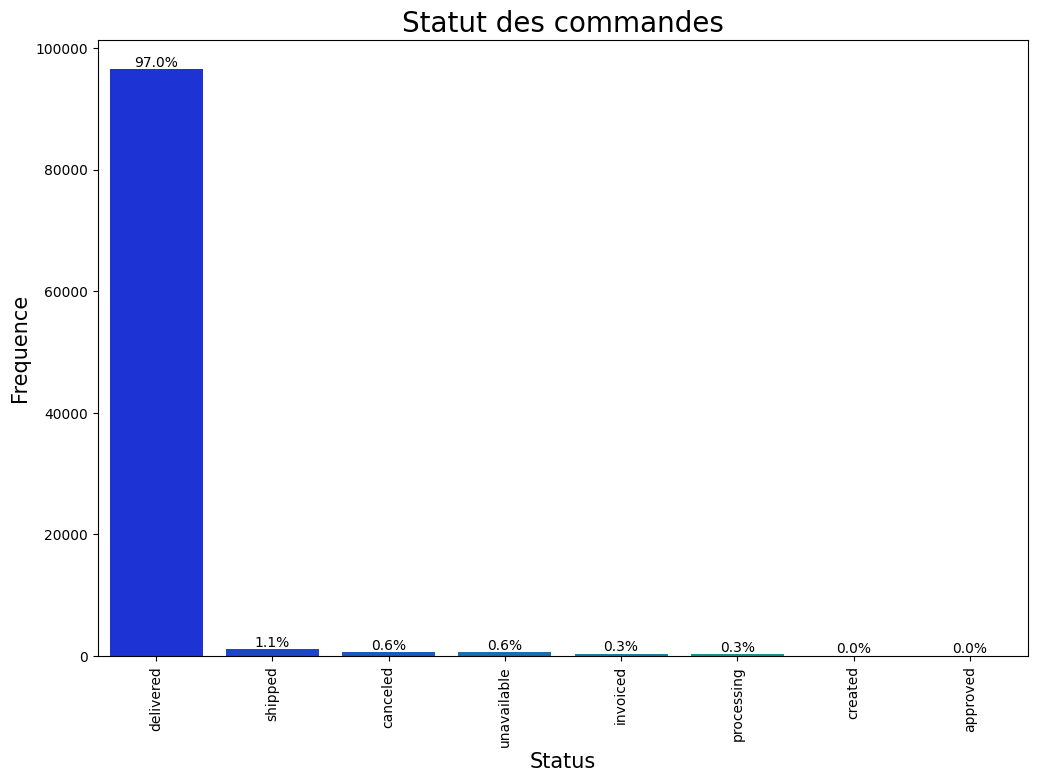

In [ ]:
x = data_orders['Statut_commande']
order = data_orders['Statut_commande'].value_counts().index
count_plot(x, data_orders, "Statut des commandes", "Status", 'Frequence', 12, 8, order =order, rotation=True)

==> 97% des commandes sont livrées

> ## **Distribution des commandes par heure**

In [ ]:
data_orders['Horodatage_achat_heure'].value_counts()

16    6675
11    6578
14    6569
13    6518
15    6454
21    6217
20    6193
10    6177
17    6150
12    5995
19    5982
22    5816
18    5769
09    4785
23    4123
08    2967
00    2394
07    1231
01    1170
02     510
06     502
03     272
04     206
05     188
Name: Horodatage_achat_heure, dtype: int64

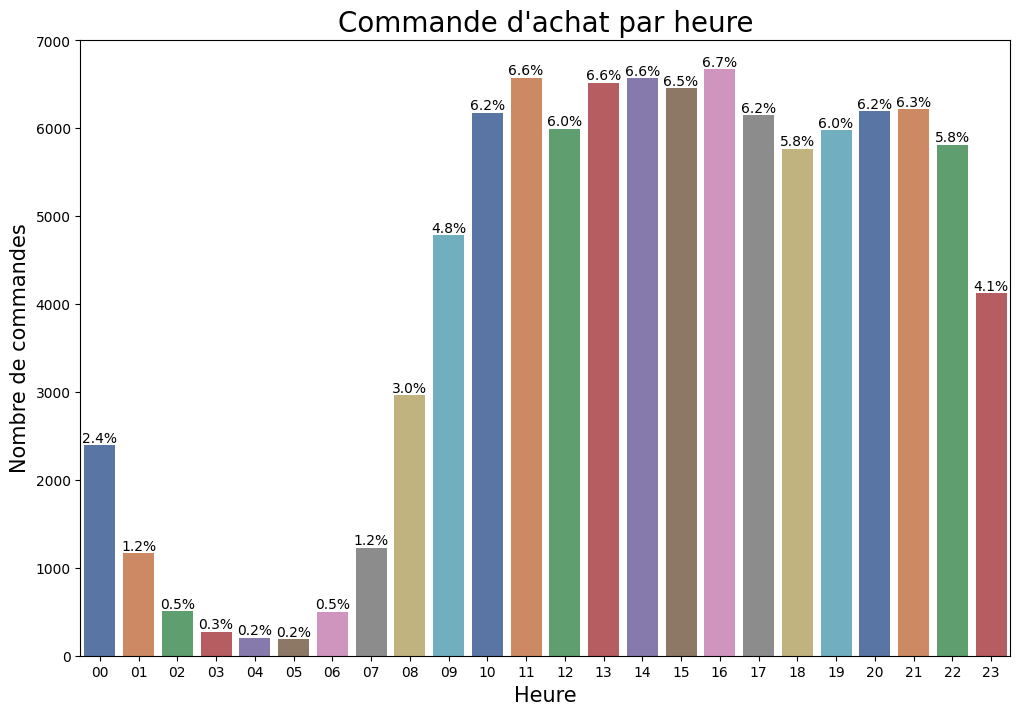

In [ ]:
x = data_orders['Horodatage_achat_heure']
commande = [str(i).zfill(2) for i in range(24)]
count_plot(x, data_orders, 'Commande d\'achat par heure', 'Heure', 'Nombre de commandes', 12, 8, order=commande, palette='deep')

>> **Distribution des commandes selon le moment de la journée**

In [ ]:
data_orders['Horodatage_achat_time_day'].value_counts()

PM    72461
AM    26980
Name: Horodatage_achat_time_day, dtype: int64

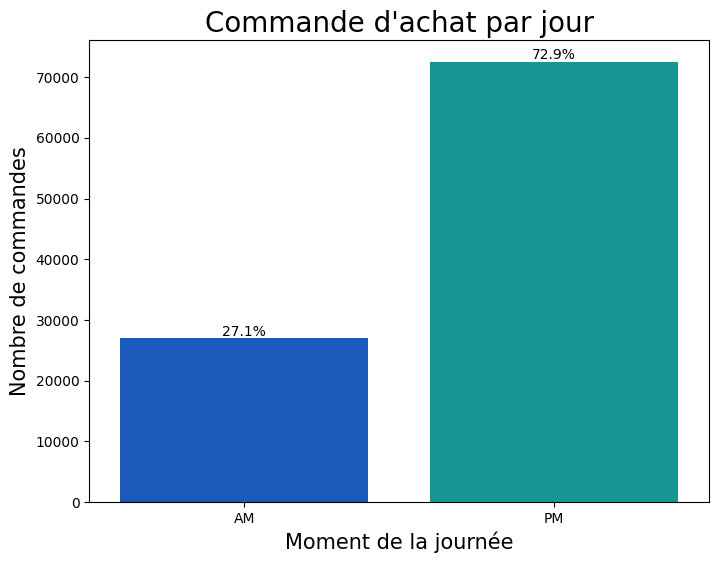

In [ ]:
x = data_orders['Horodatage_achat_time_day']
count_plot(x, data_orders, 'Commande d\'achat par jour', 'Moment de la journée', 'Nombre de commandes', 8, 6, order=['AM','PM'])

==> Les clients préfèrent l'heure de l'après-midi.

>> Voyons cela de plus près

In [ ]:
time_of_day = []
for time in data_orders['Horodatage_achat_heure']:

    try:
        time = int(time)
        if time >= 6 and time < 12:
            time_of_day.append('Matin')
        elif time >= 12 and time < 17:
            time_of_day.append('Après-midi')
        elif time >= 17 and time <= 20:
            time_of_day.append('soir')
        else:
            time_of_day.append('nuit')

    except:
        time_of_day.append('Unknown')

In [ ]:
data_orders['classification_horodatage_achat'] = time_of_day

In [ ]:
data_orders['classification_horodatage_achat'].value_counts()

Après-midi    32211
soir          24094
Matin         22240
nuit          20896
Name: classification_horodatage_achat, dtype: int64

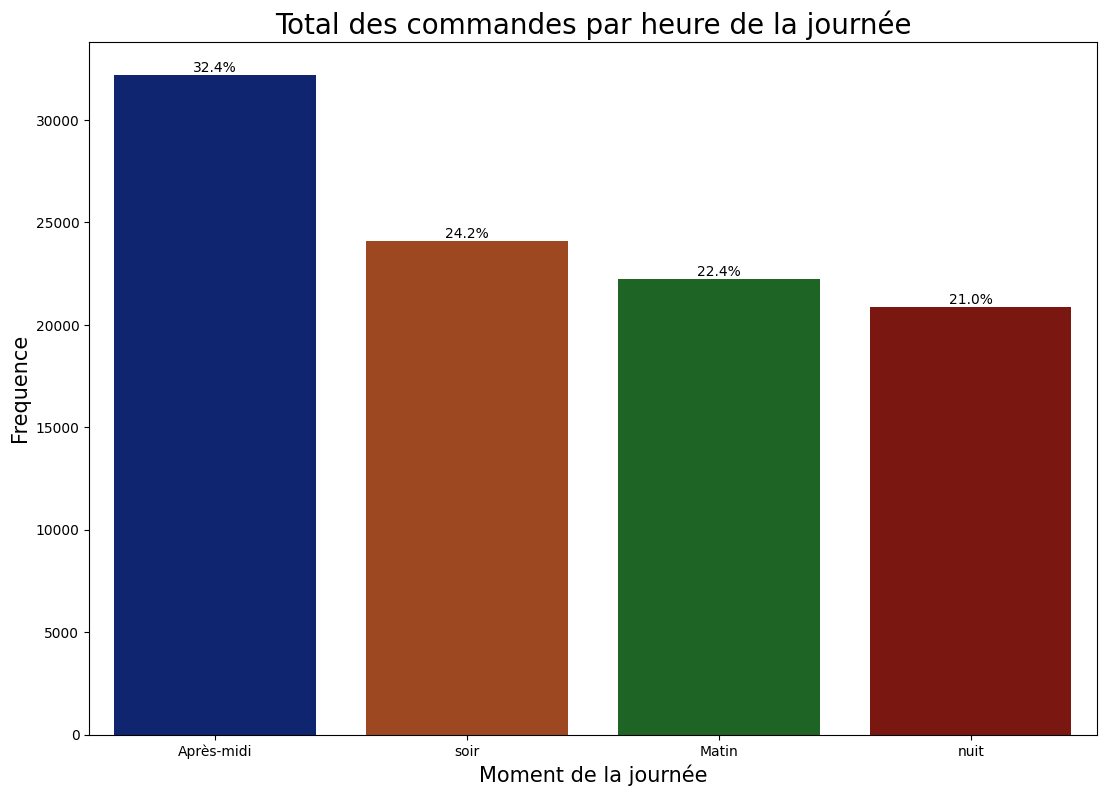

In [ ]:
x = data_orders['classification_horodatage_achat']
commande = x.value_counts().index
count_plot(x, data_orders,'Total des commandes par heure de la journée', 'Moment de la journée' , 'Frequence', 13,9, order=commande, palette='dark')

==> La plupart des commandes sont passées dans l'après-midi

> ## **Distribution des commandes par jour**

>>  **Repartition commandes selon le jour du mois**

In [ ]:
data_orders['Horodatage_achat_jour'].value_counts()

24    3877
16    3581
15    3524
4     3483
6     3468
5     3445
18    3430
14    3387
19    3364
7     3363
8     3326
11    3308
25    3290
26    3290
3     3283
13    3277
9     3271
20    3261
2     3213
12    3202
17    3200
22    3181
10    3168
23    3128
27    3122
21    3116
1     3101
28    3011
29    2557
30    2534
31    1680
Name: Horodatage_achat_jour, dtype: int64

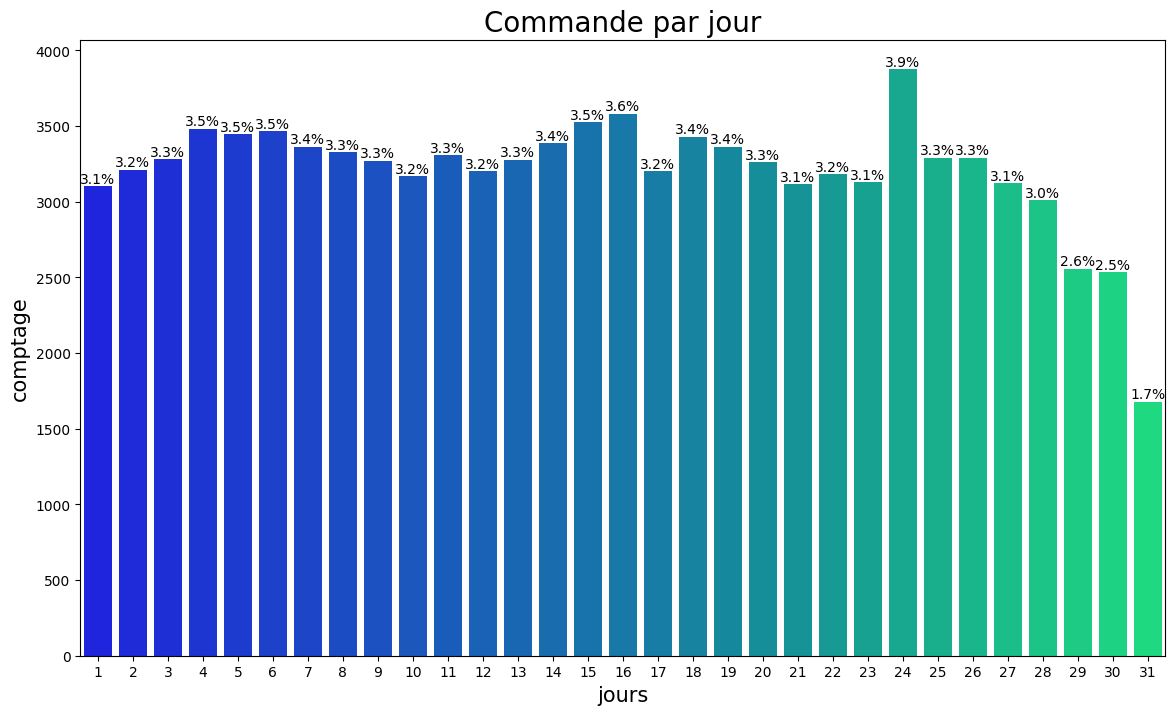

In [ ]:
x = data_orders['Horodatage_achat_jour']
commande = [str(i) for i in range(1,32)]
count_plot(x, data_orders, 'Commande par jour', 'jours', 'comptage', 14,8, order=commande)

>>  **Repartition des commandes selon le jour de la semaine**

In [ ]:
data_orders['Horodatage_achat_dayofweek_nom'].value_counts()

Mon    16196
Tue    15963
Wed    15552
Thu    14761
Fri    14122
Sun    11960
Sat    10887
Name: Horodatage_achat_dayofweek_nom, dtype: int64

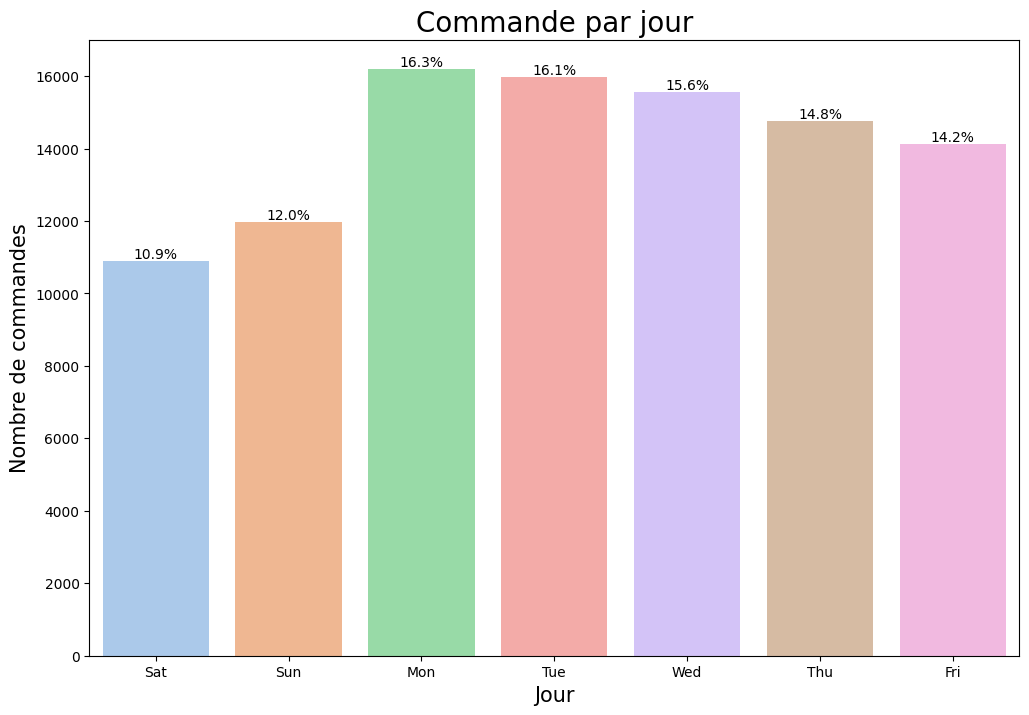

In [ ]:
commande = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
x = data_orders['Horodatage_achat_dayofweek_nom']
count_plot(x, data_orders,"Commande par jour", "Jour", "Nombre de commandes", 12, 8, order=commande, palette='pastel')

> ## **Distribution des commandes par mois**

In [ ]:
data_orders['Horodatage_achat_mois_nom'].value_counts()

Aug    10843
May    10573
Jul    10318
Mar     9893
Jun     9412
Apr     9343
Feb     8508
Jan     8069
Nov     7544
Dec     5674
Oct     4959
Sep     4305
Name: Horodatage_achat_mois_nom, dtype: int64

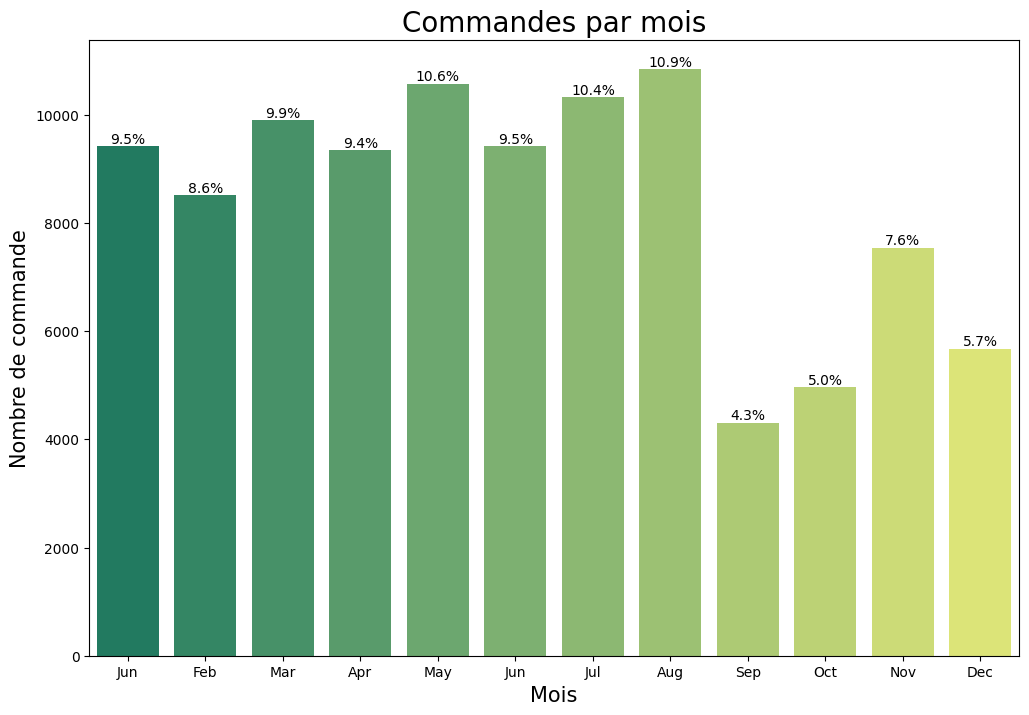

In [ ]:
commande = ['Jun', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = data_orders['Horodatage_achat_mois_nom']
count_plot(x, data_orders, 'Commandes par mois', 'Mois', 'Nombre de commande', 12, 8, order=commande, palette='summer')

> ## **Evolution des commandes sur un an**

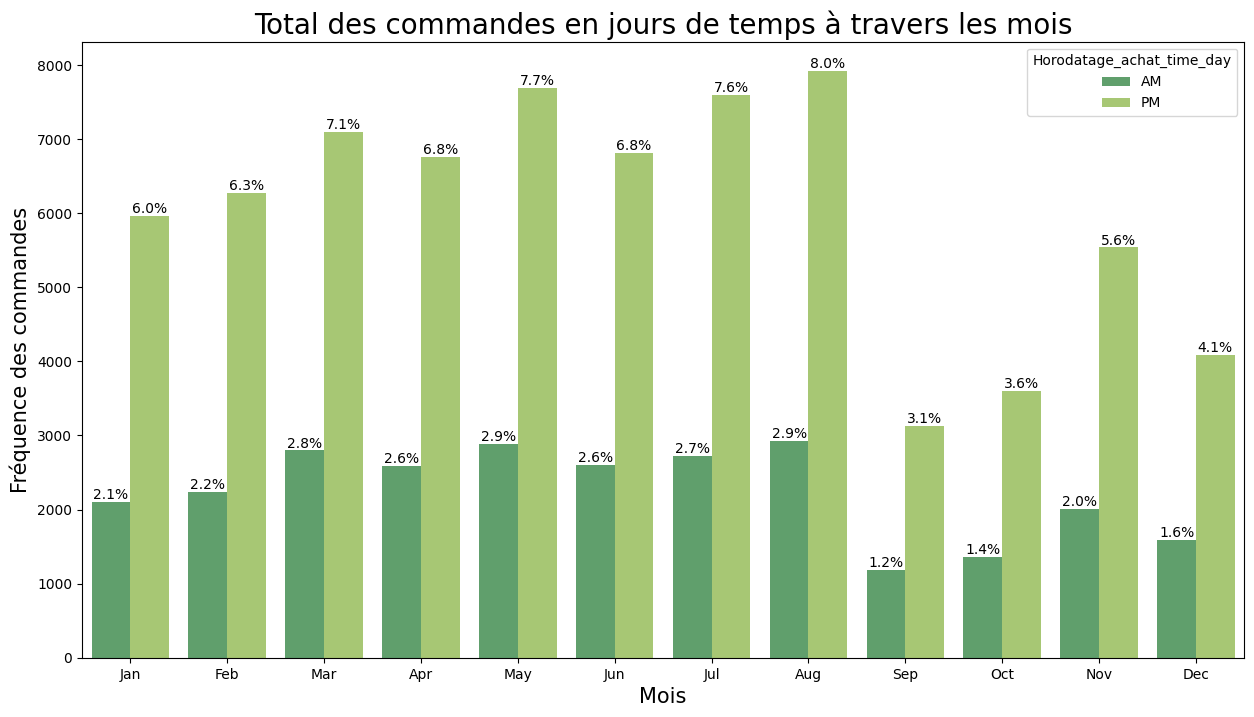

In [ ]:
x = data_orders['Horodatage_achat_mois_nom']
hue = data_orders['Horodatage_achat_time_day']
commande = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
count_plot(x,data_orders, "Total des commandes en jours de temps à travers les mois", "Mois", "Fréquence des commandes", 15,8, order=commande, palette='summer', hue=hue)

> ## **Repartition des commandes par année d\'exercice**

In [ ]:
data_orders['Horodatage_achat_annee'].value_counts().index

Index(['2018', '2017', '2016'], dtype='object')

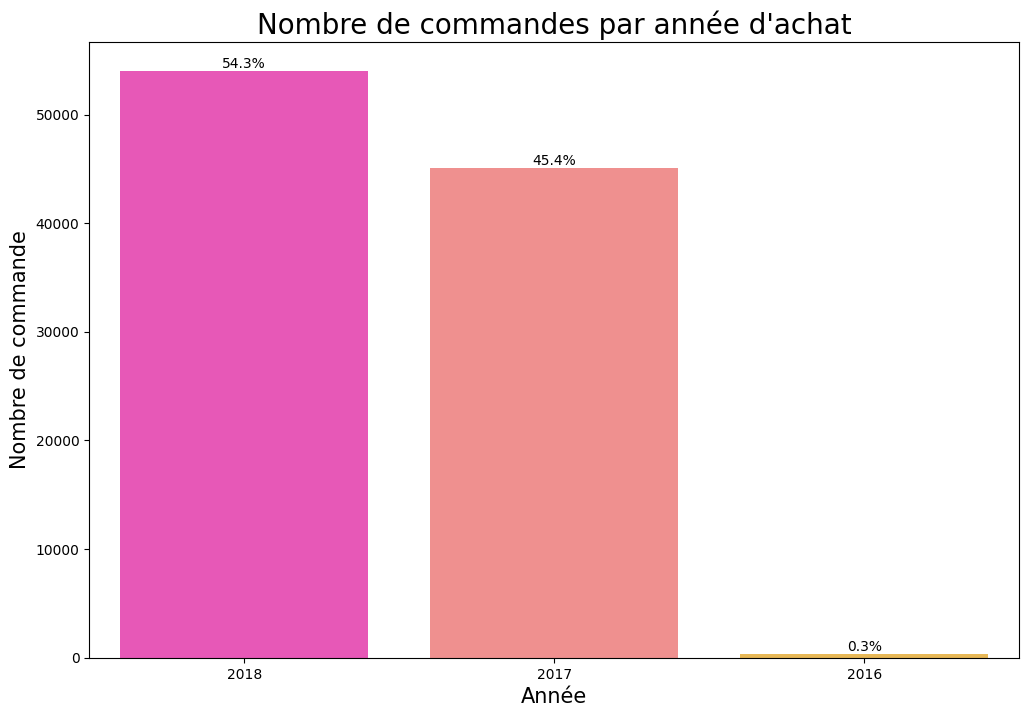

In [ ]:
x = data_orders['Horodatage_achat_annee']
order = data_orders['Horodatage_achat_annee'].value_counts().index
count_plot(x, data_orders, 'Nombre de commandes par année d\'achat', 'Année', 'Nombre de commande', 12, 8, order=order, palette='spring')

==> Il y a une nette augmentation des ventes en ligne au fil des ans

>> **Evolution des commandes suivant les années d'exercices**

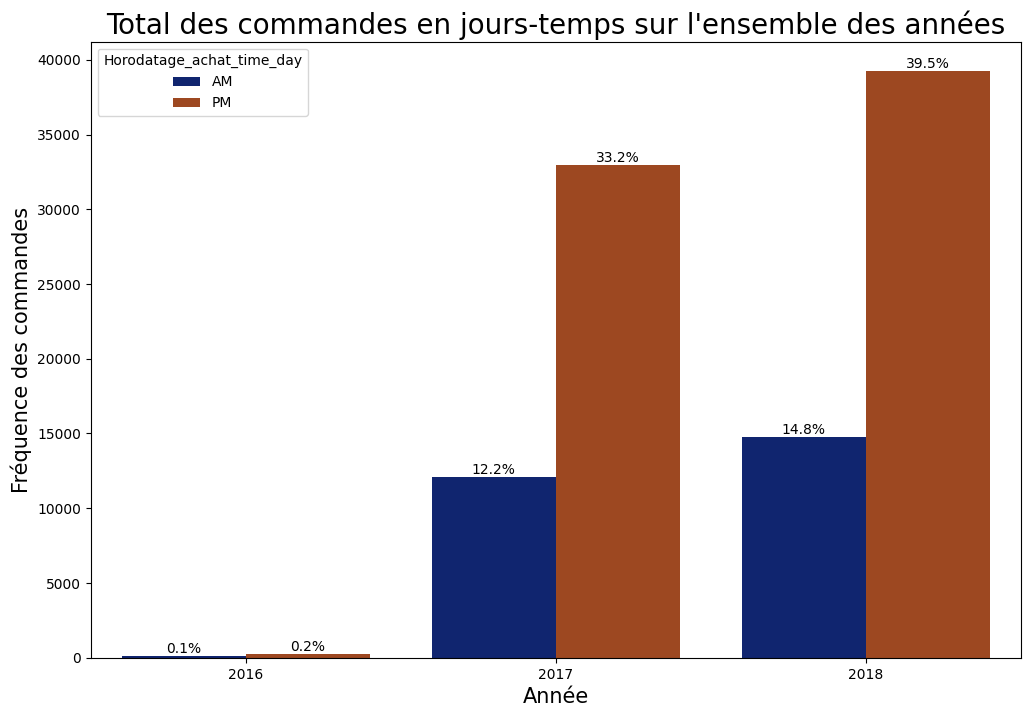

In [ ]:
x = data_orders['Horodatage_achat_annee']
hue = data_orders['Horodatage_achat_time_day']
commande = ['2016', '2017', '2018']
count_plot(x,data_orders, "Total des commandes en jours-temps sur l'ensemble des années", "Année", "Fréquence des commandes", 12,8, order=commande, palette='dark', hue=hue)

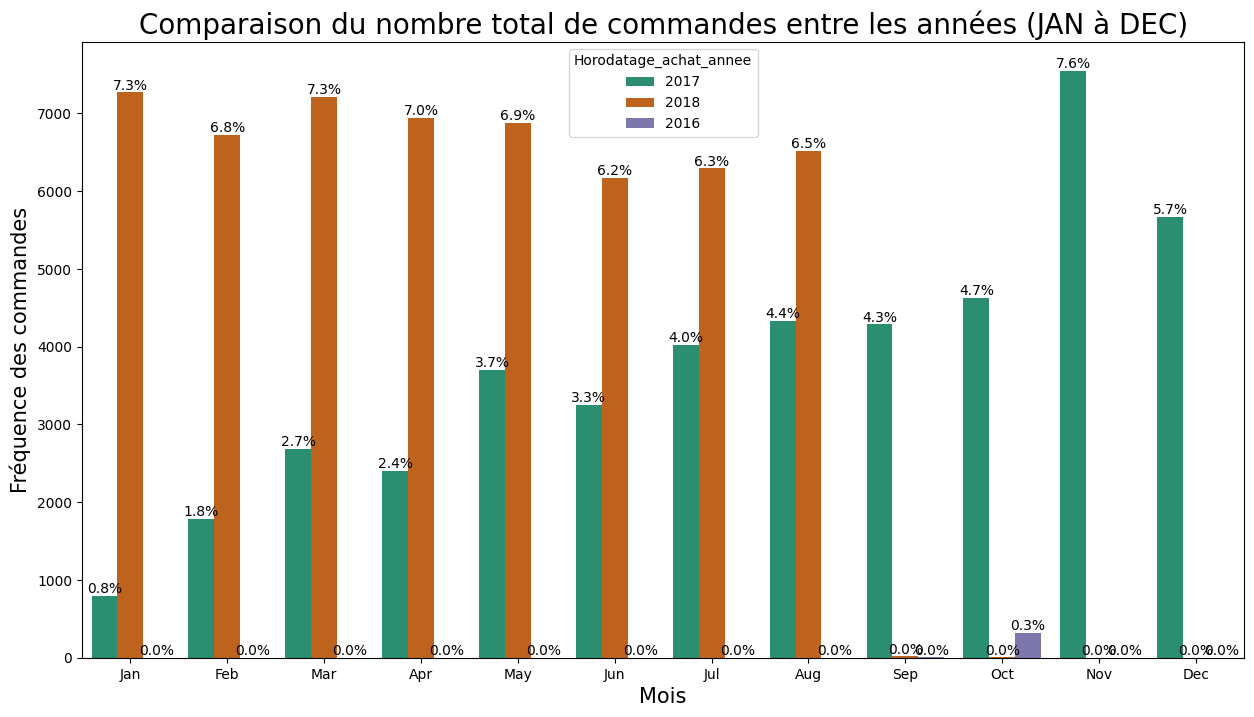

In [ ]:
commande = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = data_orders['Horodatage_achat_mois_nom']
hue = data_orders['Horodatage_achat_annee']
count_plot(x,data_orders, "Comparaison du nombre total de commandes entre les années (JAN à DEC)", "Mois", "Fréquence des commandes", 15,8, order=commande, palette='Dark2', hue=hue)

==> Il est clair qu'il y a une augmentation significative des ventes entre 2017 (JAN à AUG) et 2018 (JAN à AUG).

>> **Évolution du total des commandes dans le marché bresilien**

In [ ]:
data_orders['Horodatage_achat_annee_mois'].value_counts()

2017 11    7544
2018 01    7269
2018 03    7211
2018 04    6939
2018 05    6873
2018 02    6728
2018 08    6512
2018 07    6292
2018 06    6167
2017 12    5673
2017 10    4631
2017 08    4331
2017 09    4285
2017 07    4026
2017 05    3700
2017 06    3245
2017 03    2682
2017 04    2404
2017 02    1780
2017 01     800
2016 10     324
2018 09      16
2016 09       4
2018 10       4
2016 12       1
Name: Horodatage_achat_annee_mois, dtype: int64

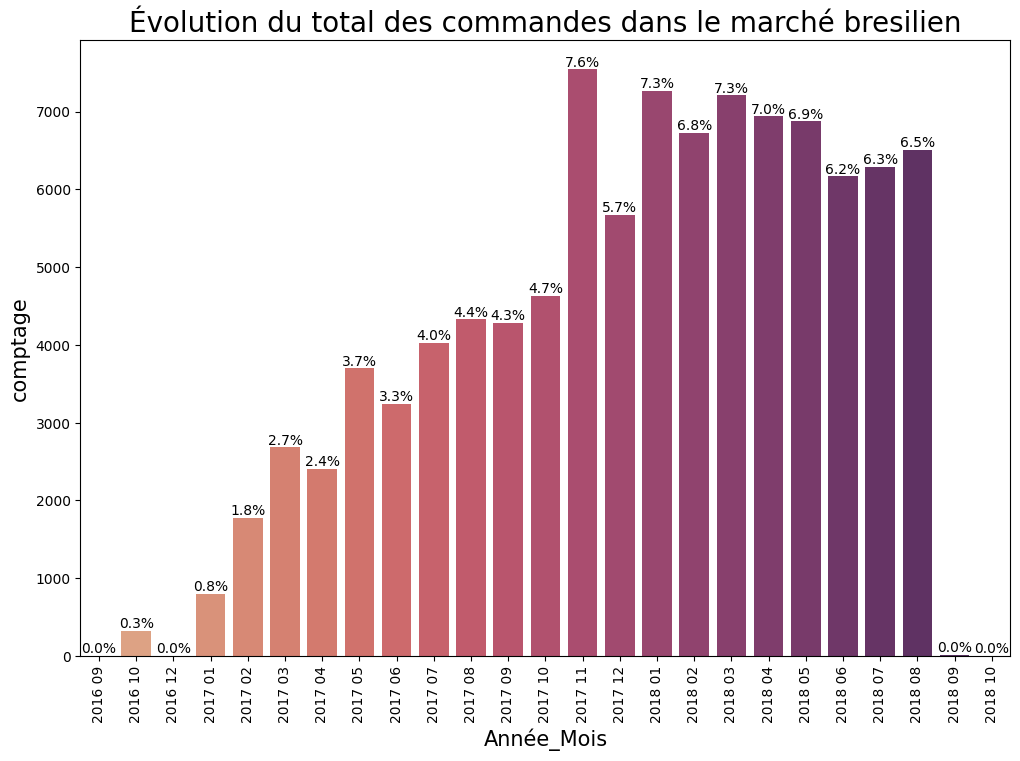

In [ ]:
x = data_orders['Horodatage_achat_annee_mois'].value_counts().index
y = data_orders['Horodatage_achat_annee_mois'].value_counts().values
commande = sorted(x)
bar_plot(x, y, data_orders, "Évolution du total des commandes dans le marché bresilien", "Année_Mois", "comptage", 12,8, rotation=True, palette='flare', order=commande)

==> Nous pouvons voir clairement que les clients sont plus enclins à acheter des choses en ligne qu'auparavant.

> ## **Répartition des moyens de paiement**

In [ ]:
data_order_payment.head()

,Identifiant_commande,Paiement_séquentiel,Type_paiement,Paiement_en_plusieurs_fois,Valeur_paiement
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.330
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.390
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.710
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.780
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.450


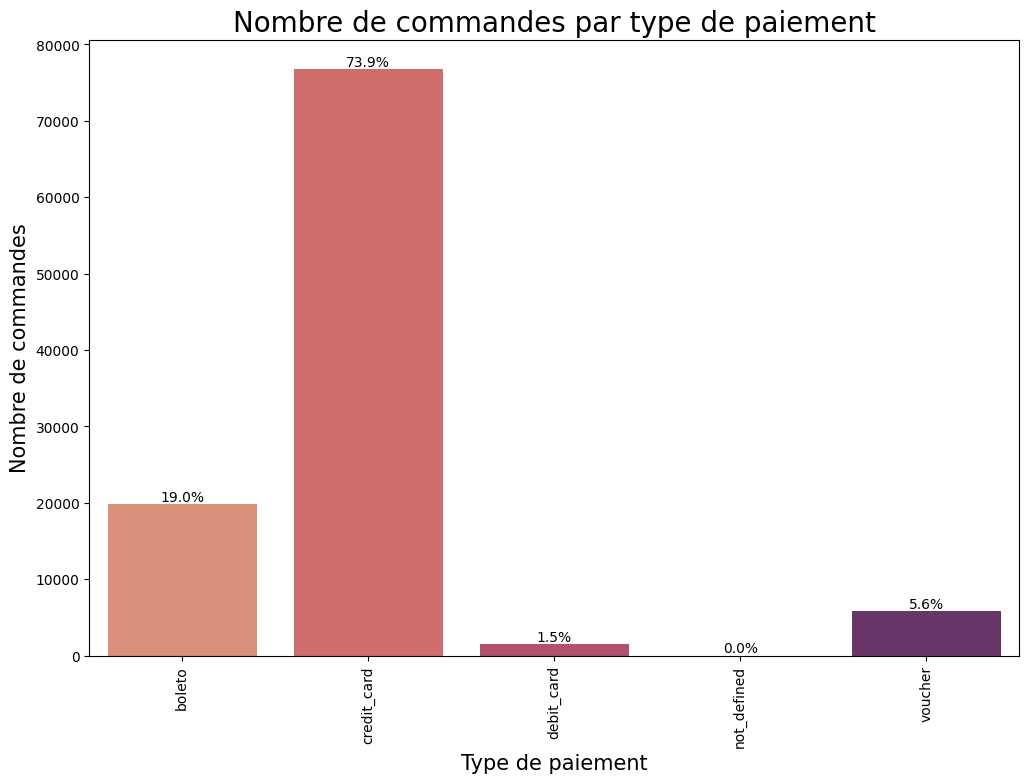

In [ ]:
x = data_order_payment['Type_paiement'].value_counts().index
y = data_order_payment['Type_paiement'].value_counts().values
commande = sorted(x)
bar_plot(x, y, data_order_payment, "Nombre de commandes par type de paiement", "Type de paiement", "Nombre de commandes", 12,8, rotation=True, palette='flare', order=commande)

> ## **Les produits les plus achetés par catégories**

In [ ]:
data_products.head()

,Identifiant_produit,Nom_categorie_produit,Longueur_nom_produit,Longueur_description_produit,Quantite_photos_produit,Poids_produit_g,Longueur_produit_cm,Hauteur_produit_cm,Largeur_produit_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.000,287.000,1.000,225.000,16.000,10.000,14.000
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.000,276.000,1.000,1000.000,30.000,18.000,20.000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.000,250.000,1.000,154.000,18.000,9.000,15.000
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.000,261.000,1.000,371.000,26.000,4.000,26.000
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.000,402.000,4.000,625.000,20.000,17.000,13.000


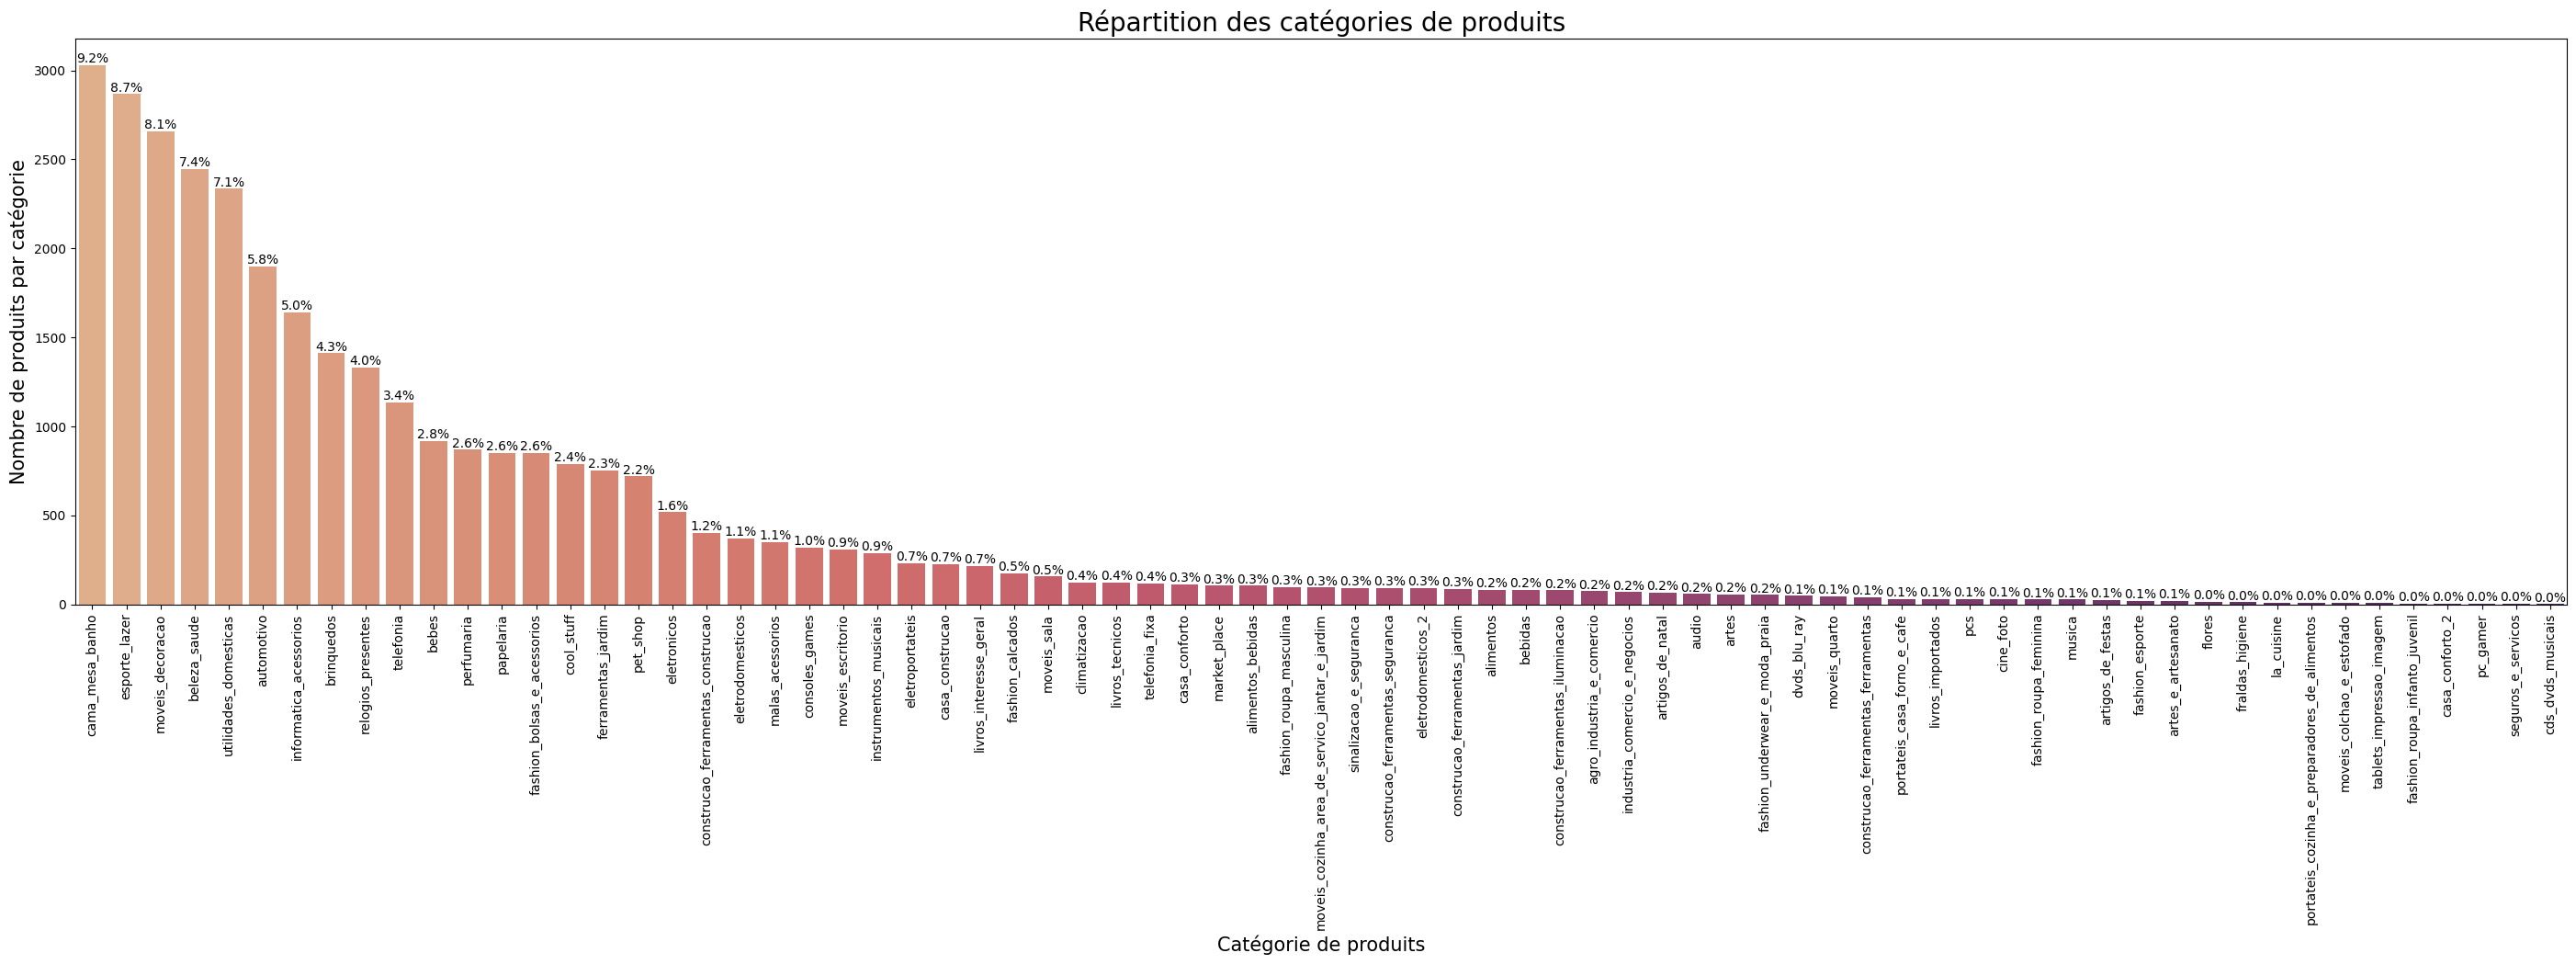

In [ ]:
x = data_products['Nom_categorie_produit'].value_counts().index
y = data_products['Nom_categorie_produit'].value_counts().values

bar_plot(x, y, data_products, "Répartition des catégories de produits", "Catégorie de produits", "Nombre de produits par catégorie", 35,8, rotation=True, palette='flare')

>> **Distribution des dépenses dans la catégorie « cama_mesa_banho »**

In [ ]:
df_produits = pd.merge(data_products, data_order_items, on='Identifiant_produit')

<ipython-input-189-9b20430f6229>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cama_mesa_banho['Prix'], hist=True, kde=True, color='skyblue',


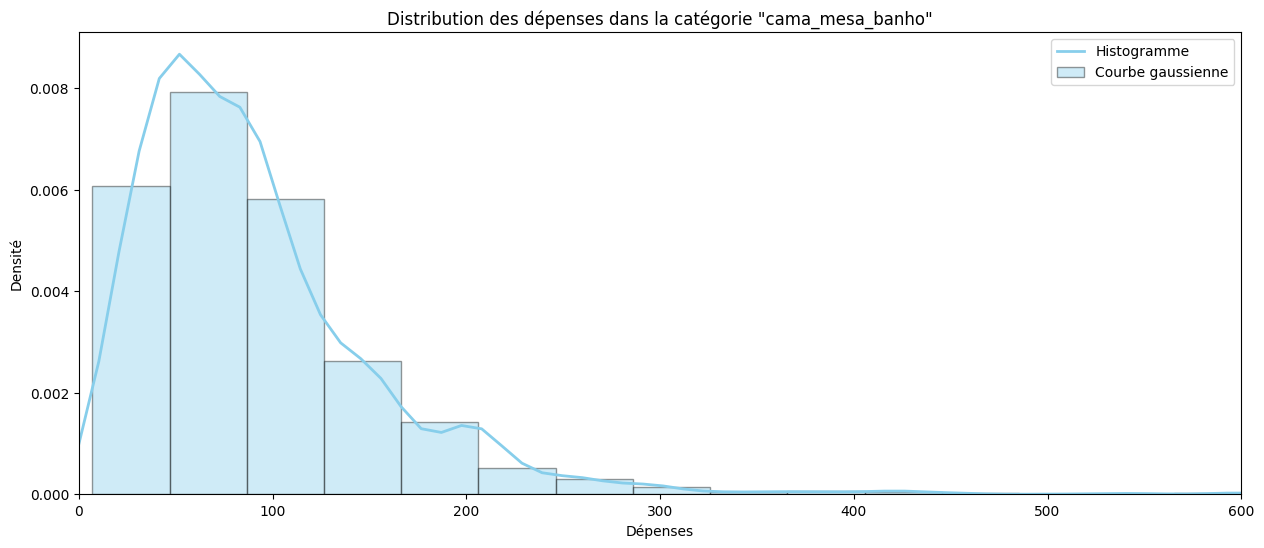

In [ ]:
# Filtrer les données pour la catégorie 'cama_mesa_banho'
data_cama_mesa_banho = df_produits[df_produits['Nom_categorie_produit'] == 'cama_mesa_banho']

# Tracer la distribution des dépenses avec histogramme et courbe gaussienne
plt.figure(figsize=(15, 6))
sns.distplot(data_cama_mesa_banho['Prix'], hist=True, kde=True, color='skyblue',
             hist_kws={'edgecolor': 'black', 'linewidth': 1},
             kde_kws={'linewidth': 2})

# Limiter l'axe x à une valeur maximale de 1000
plt.gca().set_xlim(0, 600)

# Définir les étiquettes des axes et le titre du graphique
plt.xlabel('Dépenses')
plt.ylabel('Densité')
plt.title('Distribution des dépenses dans la catégorie "cama_mesa_banho"')

# Ajouter la légende
plt.legend(labels=['Histogramme', 'Courbe gaussienne'])

# Afficher le graphique
plt.show()


> ## **Performance par Ville**

In [ ]:
top_20_villes = data_clients['Ville_client'].value_counts().head(20)

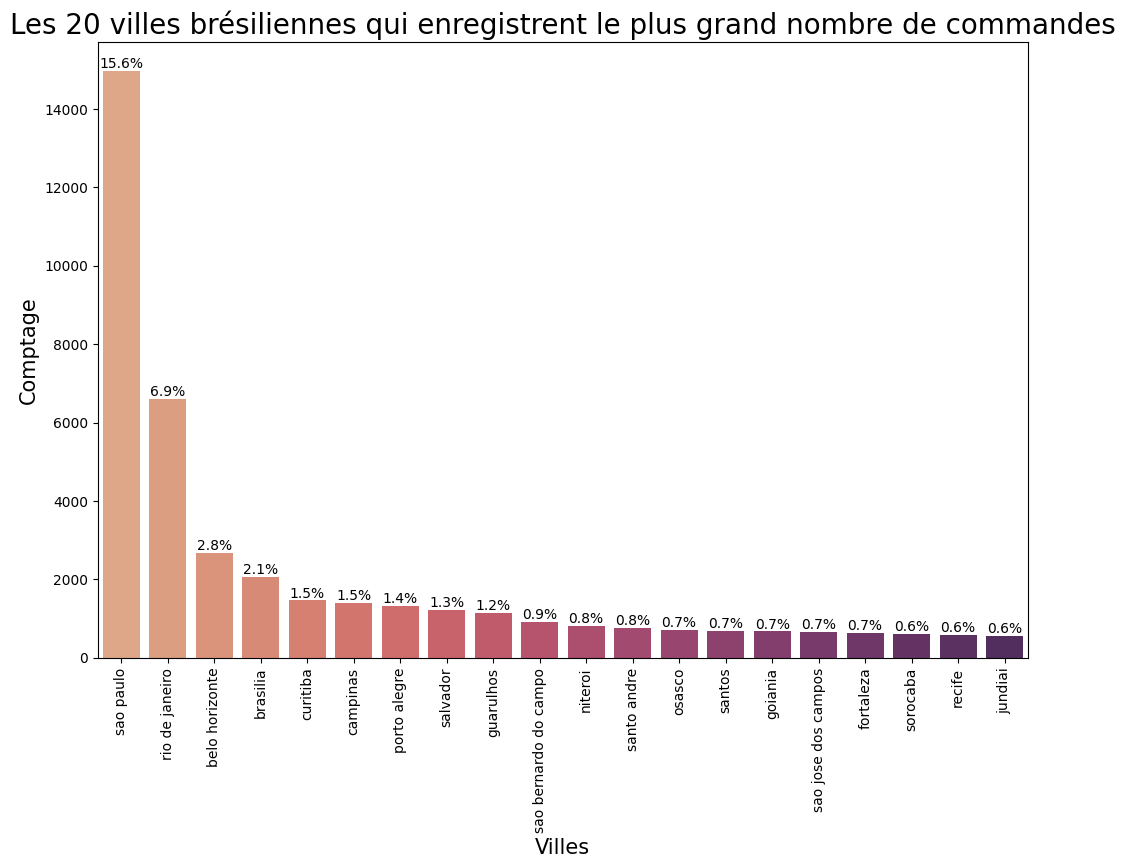

In [ ]:
x = top_20_villes.index
y = top_20_villes.values
bar_plot(x,y, data_clients, 'Les 20 villes brésiliennes qui enregistrent le plus grand nombre de commandes', 'Villes', 'Comptage', 12,8, rotation=True, palette='flare')

> ## **Performance par Etats**

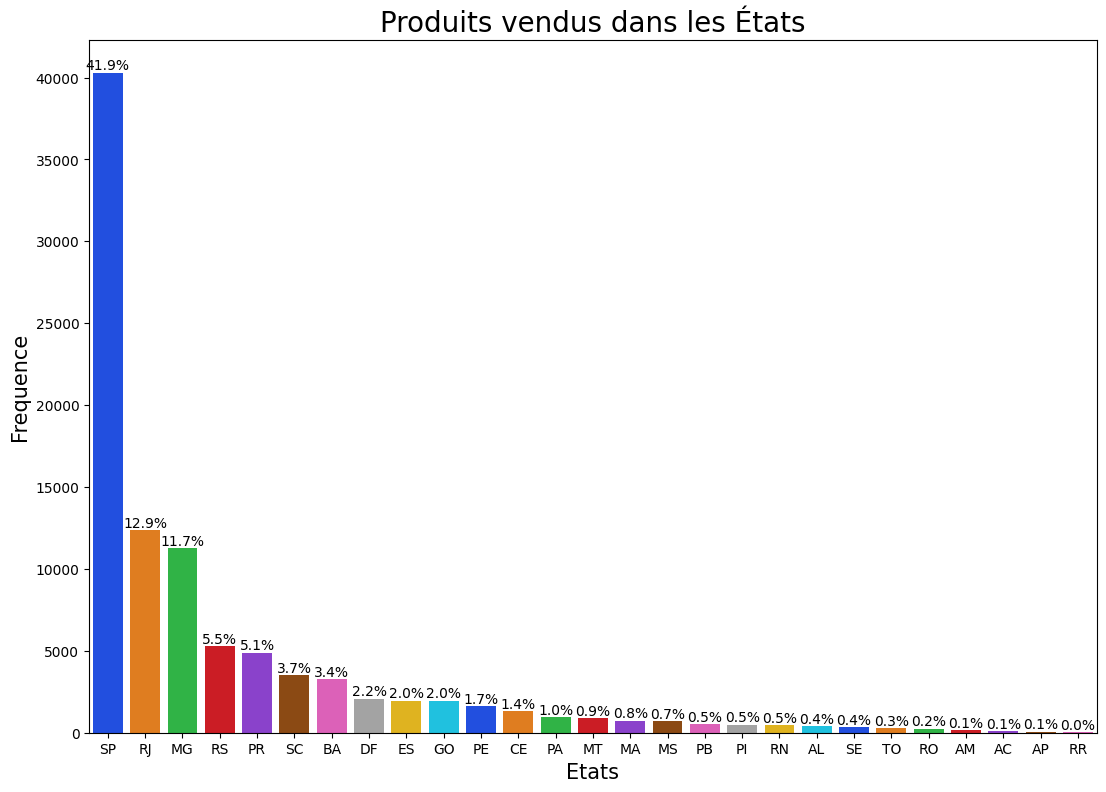

In [ ]:
count_plot(data_clients['Etat_client'], data_clients, "Produits vendus dans les États", "Etats", 'Frequence', 13, 9, order=data_clients['Etat_client'].value_counts().index, palette='bright')

==> Ventes massives dans l'État de SP

> ## **Distribution de note moyen par commentaire**

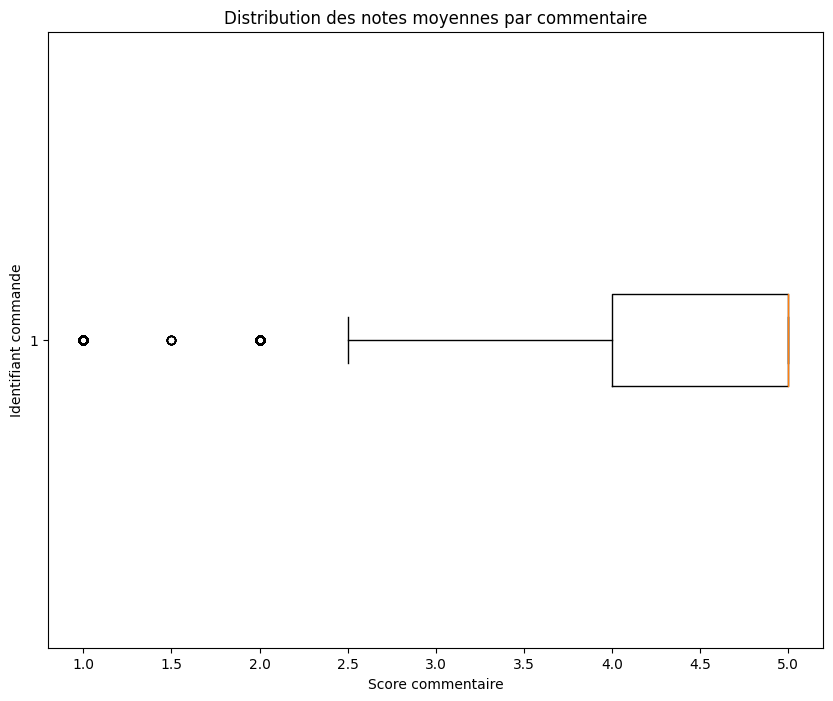

In [ ]:
# Sélectionner les variables pertinentes
data = data_order_reviews[['Identifiant_commande', 'Score_commentaire']]

# Agréger les notes moyennes par commentaire
data_agg = data.groupby('Identifiant_commande')['Score_commentaire'].mean()

# Tracer le boxplot
plt.figure(figsize = (10, 8))
plt.boxplot(data_agg, vert=False)
plt.title('Distribution des notes moyennes par commentaire')
plt.ylabel('Identifiant commande')
plt.xlabel('Score commentaire')
plt.show()

> ## **Évolution du chiffre d\'affaires**

In [ ]:
data_cust_orders_items = pd.merge(data_orders, data_order_items, on='Identifiant_commande')

In [ ]:
data_cust_orders_items.head()

,Identifiant_commande,Identifiant_client,Statut_commande,Horodatage_achat_annee,Horodatage_achat_mois,Horodatage_achat_mois_nom,Horodatage_achat_annee_mois,Horodatage_achat_jour,date_Horodatage_achat,Horodatage_achat_dayofweek,Horodatage_achat_dayofweek_nom,Horodatage_achat_heure,Horodatage_achat_time_day,Date_achat,Heure_achat,Date_validation,Heure_validation,Date_livraison_transporteur,Heure_livraison_transporteur,Date_livraison_client,Heure_livraison_client,Date_livraison_estimee,Heure_livraison_estimee,classification_horodatage_achat,Identifiant_article_commande,Identifiant_produit,Identifiant_vendeur,Prix,Frais_de_port,Date_limite_livraison,Heure_livraison_livraison
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017,10,Oct,2017 10,2,2017 10 2,1,Mon,10,AM,2017-10-02,10:56:33,2017-10-02,11:07:15,2017-10-04,19:55:00,2017-10-10,21:25:13,2017-10-18,00:00:00,Matin,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.990,8.720,2017-10-06,11:07:15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018,7,Jul,2018 07,24,2018 7 24,2,Tue,20,PM,2018-07-24,20:41:37,2018-07-26,03:24:27,2018-07-26,14:31:00,2018-08-07,15:27:45,2018-08-13,00:00:00,soir,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.700,22.760,2018-07-30,03:24:27
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018,8,Aug,2018 08,8,2018 8 8,3,Wed,08,AM,2018-08-08,08:38:49,2018-08-08,08:55:23,2018-08-08,13:50:00,2018-08-17,18:06:29,2018-09-04,00:00:00,Matin,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.900,19.220,2018-08-13,08:55:23
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017,11,Nov,2017 11,18,2017 11 18,6,Sat,19,PM,2017-11-18,19:28:06,2017-11-18,19:45:59,2017-11-22,13:39:59,2017-12-02,00:28:42,2017-12-15,00:00:00,soir,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.000,27.200,2017-11-23,19:45:59
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018,2,Feb,2018 02,13,2018 2 13,2,Tue,21,PM,2018-02-13,21:18:39,2018-02-13,22:20:29,2018-02-14,19:46:34,2018-02-16,18:17:02,2018-02-26,00:00:00,nuit,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.900,8.720,2018-02-19,20:31:37


>> **Distribution du nombre de produits achetés par client**

In [ ]:
data_selected = data_cust_orders_items[['Identifiant_client', 'Identifiant_commande']]

grouped_data = data_selected.groupby('Identifiant_client').count()

num_products = grouped_data['Identifiant_commande'].tolist()

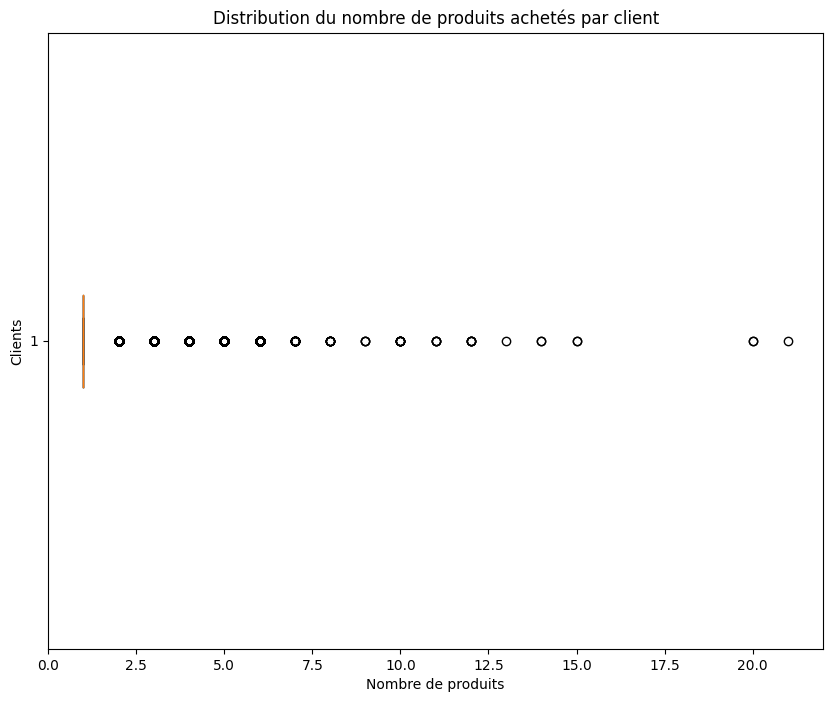

In [ ]:
plt.figure(figsize = (10, 8))
plt.boxplot(num_products, vert=False)
plt.xlabel('Nombre de produits')
plt.ylabel('Clients')
plt.title('Distribution du nombre de produits achetés par client')
plt.show()


>> **Répartition du montant maximum dépensé par commande**

<ipython-input-130-f5b6ecbf7a79>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(montants_depenses, bins=1000, kde=True, hist=True, hist_kws={"edgecolor": "black", "alpha": 0.5},


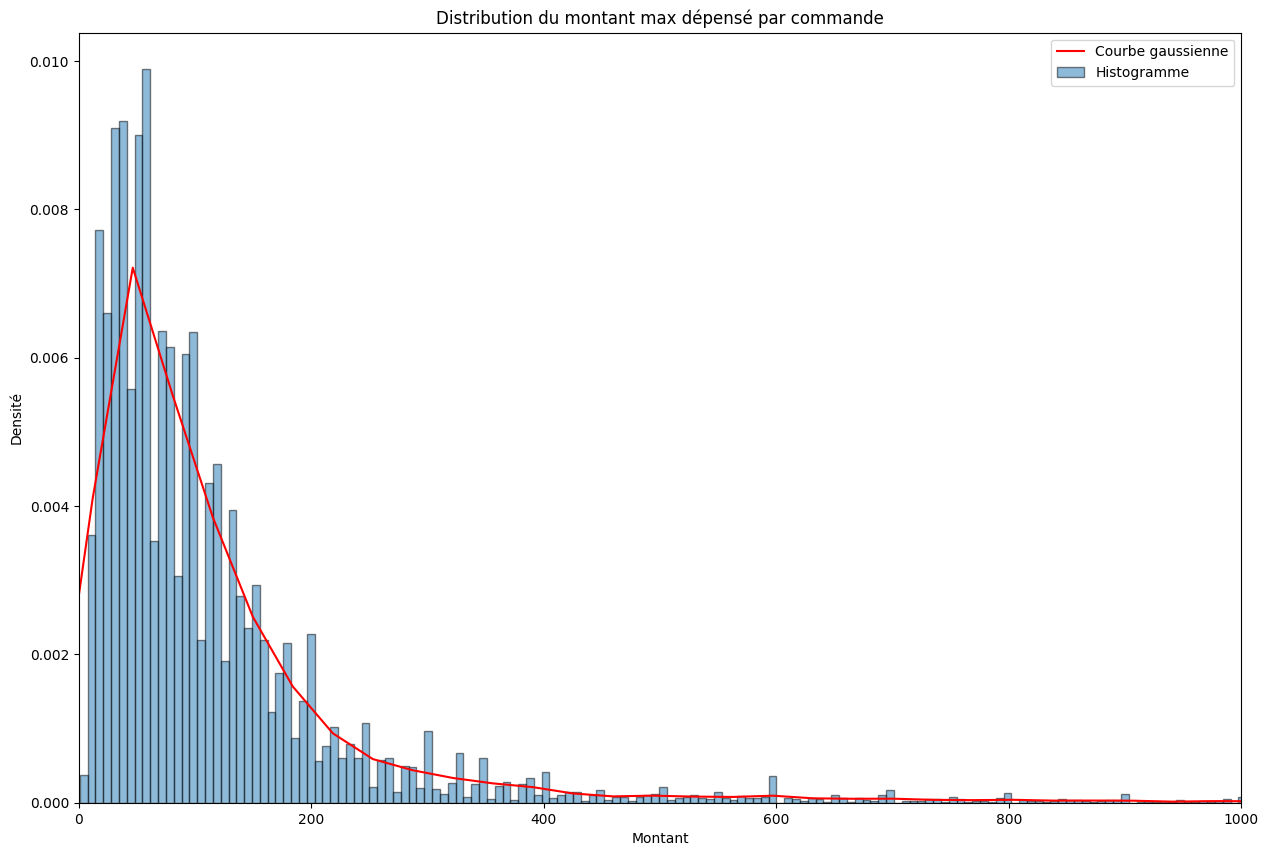

In [ ]:
montants_depenses = data_cust_orders_items.groupby('Identifiant_commande')['Prix'].max()

# Tracer l'histogramme avec une courbe de densité gaussienne
plt.figure(figsize=(15, 10))
sns.distplot(montants_depenses, bins=1000, kde=True, hist=True, hist_kws={"edgecolor": "black", "alpha": 0.5},
             kde_kws={"color": "red", "label": "Courbe de densité"})

# Ajouter des légendes et des titres
plt.xlabel("Montant")
plt.ylabel('Densité')
plt.title("Distribution du montant max dépensé par commande")

plt.xlim(0, 1000)

# Afficher le graphique
plt.legend(['Courbe gaussienne', 'Histogramme'])
plt.show()

>> **Sur une base annuelle et mensuelle**

In [ ]:
prix_sur_année_mois = data_cust_orders_items.groupby('Horodatage_achat_annee_mois')['Prix'].agg('sum').reset_index()

prix_sur_année_mois['ratio_prix'] = prix_sur_année_mois['Prix'] / prix_sur_année_mois['Prix'].sum()

x = prix_sur_année_mois['Horodatage_achat_annee_mois']
y = prix_sur_année_mois['Prix']

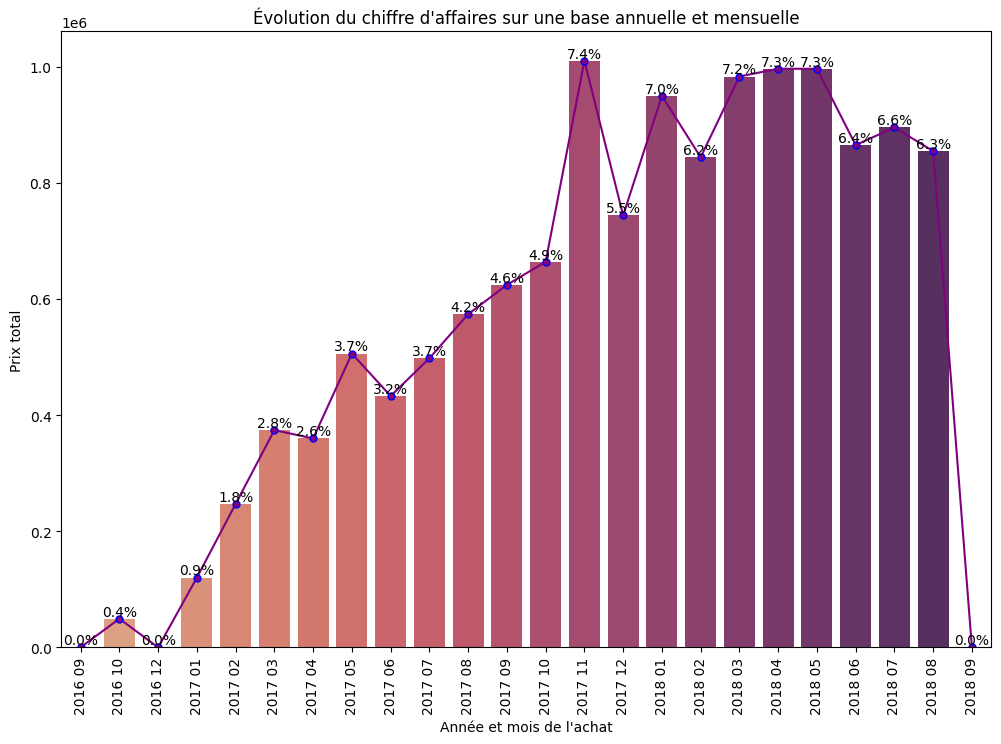

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(x, y, marker='.', color='purple', markersize=10, markeredgecolor='blue')
ax = sns.barplot(x=x, y=y, palette='flare')

# Nommage des axes
plt.xlabel('Année et mois de l\'achat')
plt.ylabel('Prix total')

# Titre du graphique
plt.title('Évolution du chiffre d\'affaires sur une base annuelle et mensuelle')

plt.xticks(rotation='vertical')
c = 0
for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(prix_sur_année_mois['ratio_prix'][c] * 100), (x.mean(), y), ha='center', va='bottom')
    c += 1

plt.show()

> ## **Fret : Evolution dans le temps**

In [ ]:
valeur_du_fret = data_cust_orders_items.groupby('Horodatage_achat_annee_mois')['Frais_de_port'].agg('sum').reset_index()
valeur_du_fret.head()

,Horodatage_achat_annee_mois,Frais_de_port
0,2016 09,87.390
1,2016 10,7301.180
2,2016 12,8.720
3,2017 01,16875.620
4,2017 02,38977.600


In [ ]:
import math

In [ ]:
# Regrouper les données par mois et calculer la valeur moyenne de "Frais_de_port"
grouped = valeur_du_fret.groupby('Horodatage_achat_annee_mois').mean()

# Initialiser une liste vide pour stocker les valeurs moyennes des frais de port arrondies
val_fr_moyenne = []

# Parcourir chaque groupe et ajouter la valeur moyenne arrondie à la liste
for i, row in grouped.iterrows():
    moyenne_arrondie = math.ceil(row['Frais_de_port'])
    val_fr_moyenne.append(moyenne_arrondie)

In [ ]:
valeur_du_fret['valeur_du_fret'] = val_fr_moyenne
valeur_du_fret.head()

,Horodatage_achat_annee_mois,Frais_de_port,valeur_du_fret
0,2016 09,87.390,88
1,2016 10,7301.180,7302
2,2016 12,8.720,9
3,2017 01,16875.620,16876
4,2017 02,38977.600,38978


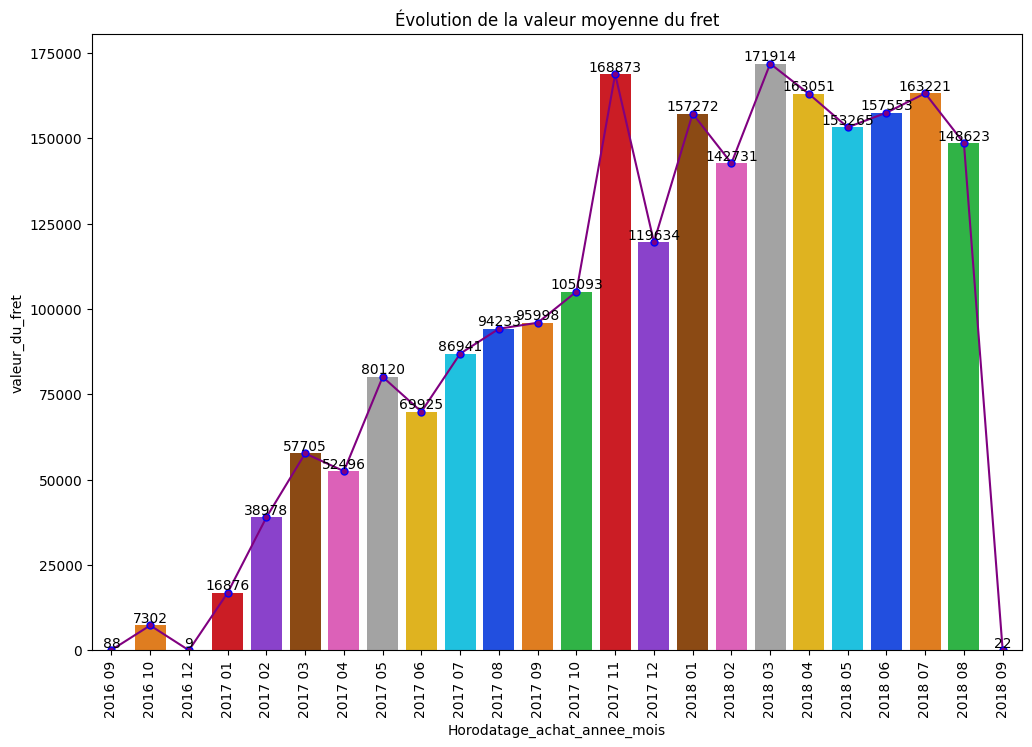

In [ ]:
x = valeur_du_fret['Horodatage_achat_annee_mois']
y = valeur_du_fret['valeur_du_fret']
plt.figure(figsize=(12,8))
plt.plot(x,y,marker='.', color='purple',markersize=10, markeredgecolor = 'blue')
ax = sns.barplot(x=x, y=y, palette='bright')
plt.xticks(rotation='vertical')
plt.title("Évolution de la valeur moyenne du fret")
c = 0
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:}'.format(valeur_du_fret['valeur_du_fret'][c]), (x.mean(), y),
                ha='center', va='bottom') # définir l'alignement du texte
        c+=1
plt.show()

>> **Par Etats**

In [ ]:
data_cust_orders = merged_data = data_cust_orders_items.merge(data_clients, on='Identifiant_client')
data_cust_orders.head()

,Identifiant_commande,Identifiant_client,Statut_commande,Horodatage_achat_annee,Horodatage_achat_mois,Horodatage_achat_mois_nom,Horodatage_achat_annee_mois,Horodatage_achat_jour,date_Horodatage_achat,Horodatage_achat_dayofweek,Horodatage_achat_dayofweek_nom,Horodatage_achat_heure,Horodatage_achat_time_day,Date_achat,Heure_achat,Date_validation,Heure_validation,Date_livraison_transporteur,Heure_livraison_transporteur,Date_livraison_client,Heure_livraison_client,Date_livraison_estimee,Heure_livraison_estimee,classification_horodatage_achat,Identifiant_article_commande,Identifiant_produit,Identifiant_vendeur,Prix,Frais_de_port,Date_limite_livraison,Heure_livraison_livraison,ID_unique_client,Code_postal_client,Ville_client,Etat_client
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017,10,Oct,2017 10,2,2017 10 2,1,Mon,10,AM,2017-10-02,10:56:33,2017-10-02,11:07:15,2017-10-04,19:55:00,2017-10-10,21:25:13,2017-10-18,00:00:00,Matin,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.990,8.720,2017-10-06,11:07:15,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018,7,Jul,2018 07,24,2018 7 24,2,Tue,20,PM,2018-07-24,20:41:37,2018-07-26,03:24:27,2018-07-26,14:31:00,2018-08-07,15:27:45,2018-08-13,00:00:00,soir,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.700,22.760,2018-07-30,03:24:27,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018,8,Aug,2018 08,8,2018 8 8,3,Wed,08,AM,2018-08-08,08:38:49,2018-08-08,08:55:23,2018-08-08,13:50:00,2018-08-17,18:06:29,2018-09-04,00:00:00,Matin,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.900,19.220,2018-08-13,08:55:23,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017,11,Nov,2017 11,18,2017 11 18,6,Sat,19,PM,2017-11-18,19:28:06,2017-11-18,19:45:59,2017-11-22,13:39:59,2017-12-02,00:28:42,2017-12-15,00:00:00,soir,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.000,27.200,2017-11-23,19:45:59,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018,2,Feb,2018 02,13,2018 2 13,2,Tue,21,PM,2018-02-13,21:18:39,2018-02-13,22:20:29,2018-02-14,19:46:34,2018-02-16,18:17:02,2018-02-26,00:00:00,nuit,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.900,8.720,2018-02-19,20:31:37,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
val_fret_par_etat = data_cust_orders.groupby('Etat_client')['Prix'].agg('mean').sort_values(ascending=False).reset_index()

In [ ]:
from math import ceil

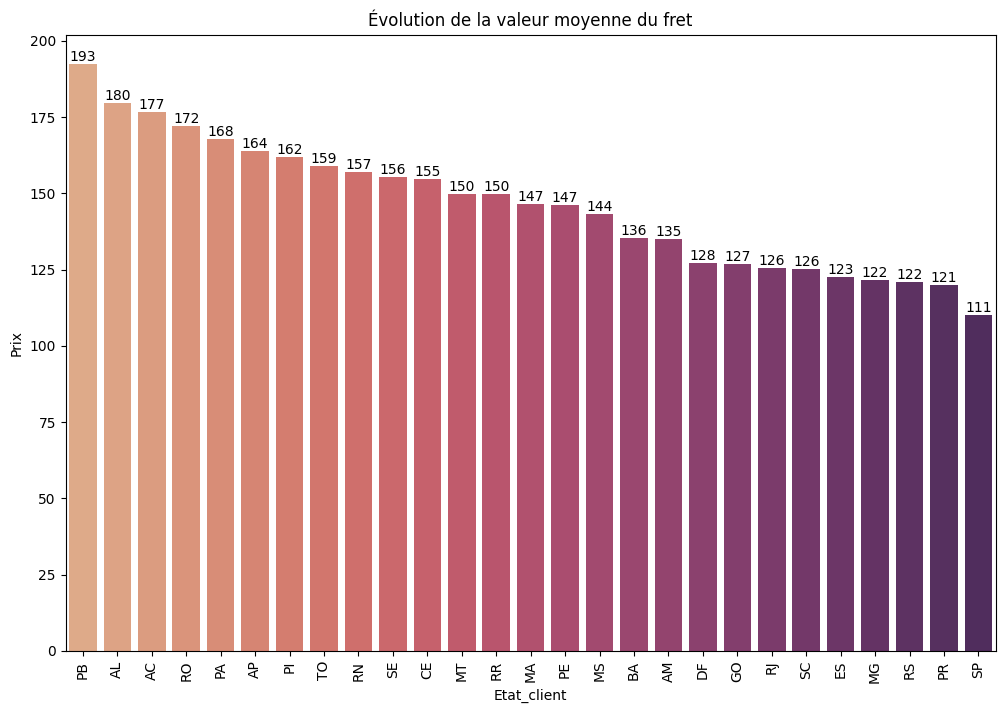

In [ ]:
x = val_fret_par_etat['Etat_client']
y = val_fret_par_etat['Prix']
plt.figure(figsize=(12,8))
ax = sns.barplot(x=x, y=y, palette='flare')
plt.xticks(rotation='vertical')
plt.title("Évolution de la valeur moyenne du fret")
c = 0
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:}'.format(ceil(val_fret_par_etat['Prix'][c])), (x.mean(), y),
                ha='center', va='bottom') # définir l'alignement du texte
        c+=1
plt.show()

# **Sauvegarde du dataframe**

In [ ]:
data_order_reviews.columns

Index(['Identifiant_commentaire', 'Identifiant_commande', 'Score_commentaire',
       'Titre_commentaire', 'Message_commentaire', 'Date_creation_commentaire',
       'Heure_creation_commentaire', 'Date_réponse_commentaire',
       'Heure_réponse_commentaire'],
      dtype='object')

In [ ]:
# Création d'une liste contenant le nouvel ordre des colonnes
new_order = ['Identifiant_commande', 'Identifiant_commentaire', 'Score_commentaire', 'Titre_commentaire',
             'Message_commentaire', 'Date_creation_commentaire', 'Heure_creation_commentaire',
             'Date_réponse_commentaire', 'Heure_réponse_commentaire']

# Chargement des données et réindexation des colonnes
df = pd.merge(pd.merge(data_orders, data_order_items, on='Identifiant_commande'),
              data_order_reviews.reindex(columns=new_order), on='Identifiant_commande')

# Exportation des données
df.to_csv('df_for_essais.csv', index=False)